# Showcase II: Spatial resampling methods & Overview creation method comparison

<div class="alert alert-block alert-info">  
<font size=3.5><strong>Section 1: </strong><br>
To determine which spatial resampling method is most approprite for the source image based on the use and interpretation of image statistics</font> 
</div>

## Step 1:

<div class="alert alert-block alert-success">
Import Modules:
<li>os: interact with the operating system</li>
<li>sys: provides functions and variables used to manipulate different parts of the Python runtime environment</li>
<li>glob: retrieve files/pathnames matching a specified pattern</li>
<li>numpy: stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays</li>
<li>matplotlib: create static, animated, and interactive visualizations</li>
<li>rasterio:  reads and writes these formats and provides a Python API based on Numpy N-dimensional arrays and GeoJSON</li>
<li>csv: handle CSV files
</div>

In [1]:
import rasterio 
import matplotlib.pyplot as plt
from rasterio.plot import show_hist, show
from matplotlib import pyplot
import numpy
import os
import sys
import glob
import csv
import pandas as pd

## Step 2:
<div class="alert alert-block alert-success">
Resample the source image using different resampling methods. <br>
The resampling methods include: 
    <li> nearest neighbour </li>
    <li> average </li>
    <li> bilinear </li>
    <li> gaussian </li>
    <li> cubic </li>
    <li> cubicspline </li>
    <li> average_magphase </li>
    <li> mode </li>
</div>

In [2]:
resample_list = ['nearest','average','bilinear','gauss','cubic','cubicspline','average_magphase','mode']
source_dem = 'C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/predata/sc2_data/dem-source_22.tif'
factor = 64
dec_factor = str(factor)

for resample in resample_list:
    print("gdaladdo -r "+ resample +" -ro " + source_dem + " --config COMPRESS_OVERVIEW LZW " + dec_factor)
    os.system("gdaladdo -r "+ resample +" -ro " + source_dem + " --config COMPRESS_OVERVIEW LZW " + dec_factor)
    ovr = '.ovr'
    ovr_path = r'{}{}'.format(source_dem,ovr) 
    new_path = r'C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/predata/test/{}_{}.tif'.format(resample,dec_factor)
    os.rename(ovr_path,new_path)

gdaladdo -r nearest -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/predata/sc2_data/dem-source_22.tif --config COMPRESS_OVERVIEW LZW 64
gdaladdo -r average -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/predata/sc2_data/dem-source_22.tif --config COMPRESS_OVERVIEW LZW 64
gdaladdo -r bilinear -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/predata/sc2_data/dem-source_22.tif --config COMPRESS_OVERVIEW LZW 64
gdaladdo -r gauss -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/predata/sc2_data/dem-source_22.tif --config COMPRESS_OVERVIEW LZW 64
gdaladdo -r cubic -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/predata/sc2_data/dem-source_22.tif --config COMPRESS_OVERVIEW LZW 64
gdaladdo -r cubicspline -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/predata/sc2_data/dem-source_22.tif --config COMPRESS_OVERVIEW LZW 64
gdaladdo -r average_magphase -ro C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/predata/sc2_data/dem-source_22.tif --config COMPRESS_OVERVIEW LZW 64
gda

## Step 3:
<div class="alert alert-block alert-success">
Read each resampled image then:
    <li>extract the information</li>
    <li>create a thumbnail and histogram</li>
</div>

C:\Users\Owner\miniconda3\envs\starrys597li\lib\site-packages\rasterio\__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\Owner\miniconda3\envs\starrys597li\lib\site-packages\rasterio\__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\Owner\miniconda3\envs\starrys597li\lib\site-packages\rasterio\__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\Owner\miniconda3\envs\starrys597li\lib\site-packages\rasterio\__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=dri

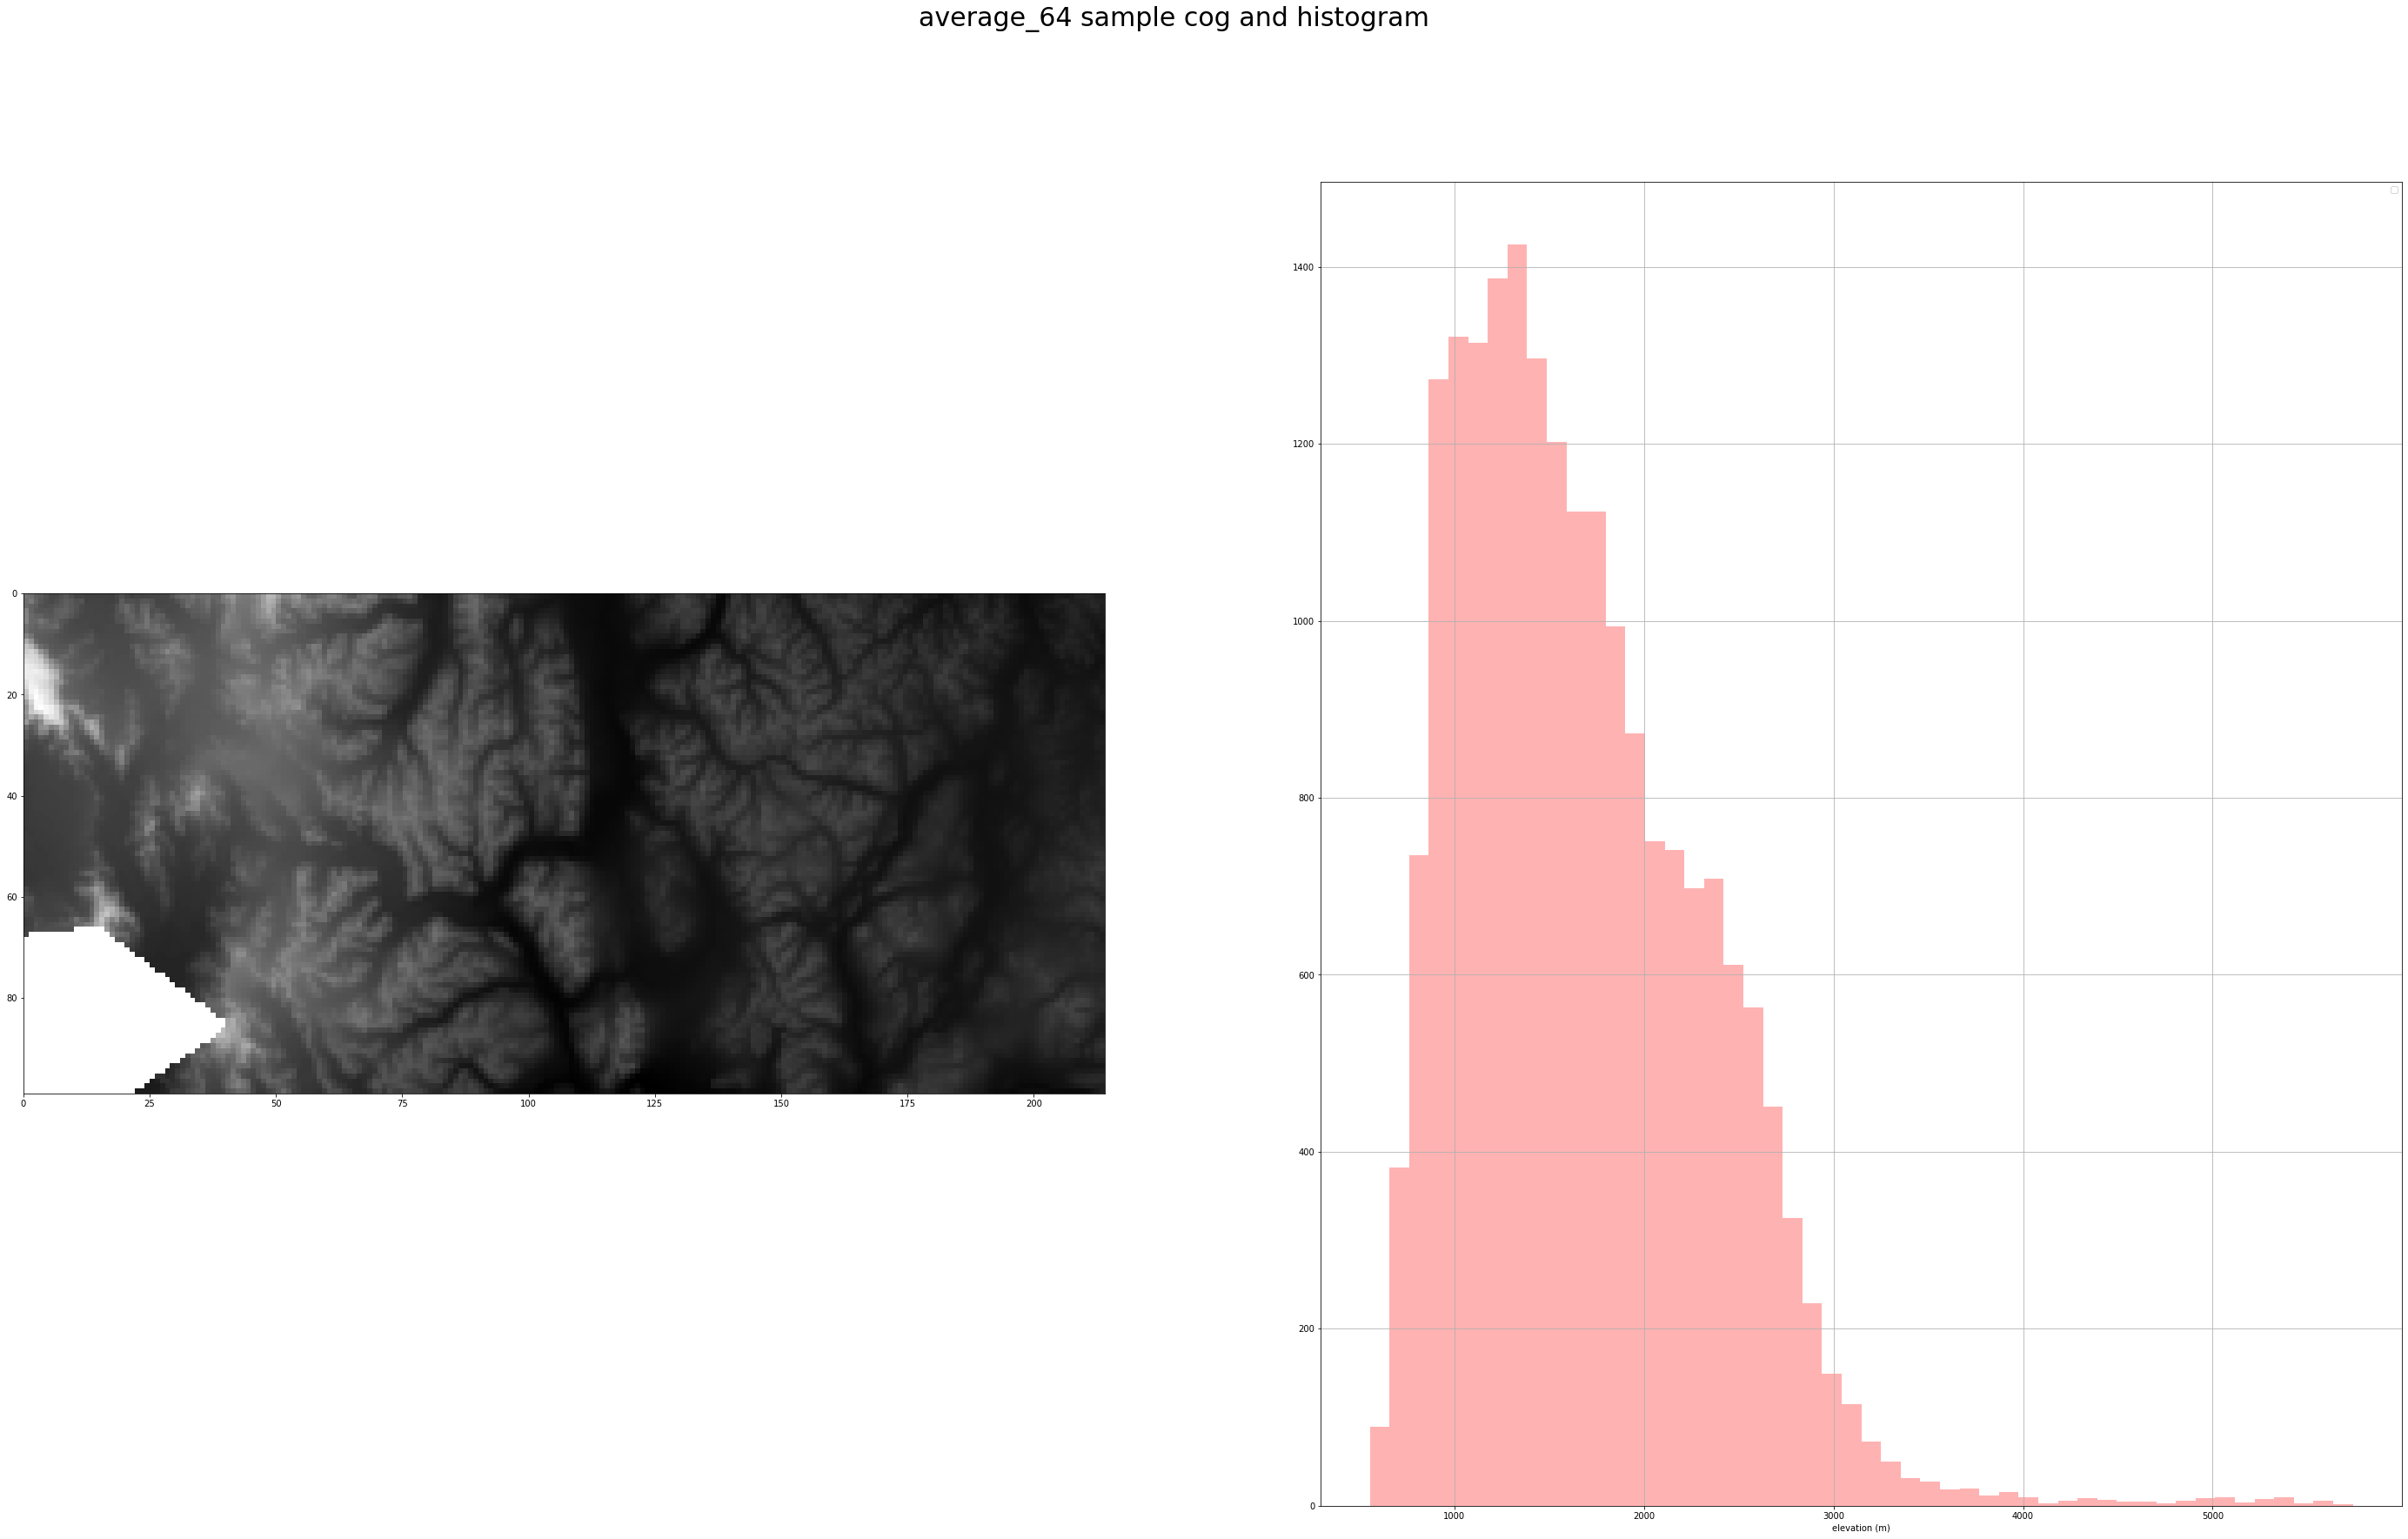

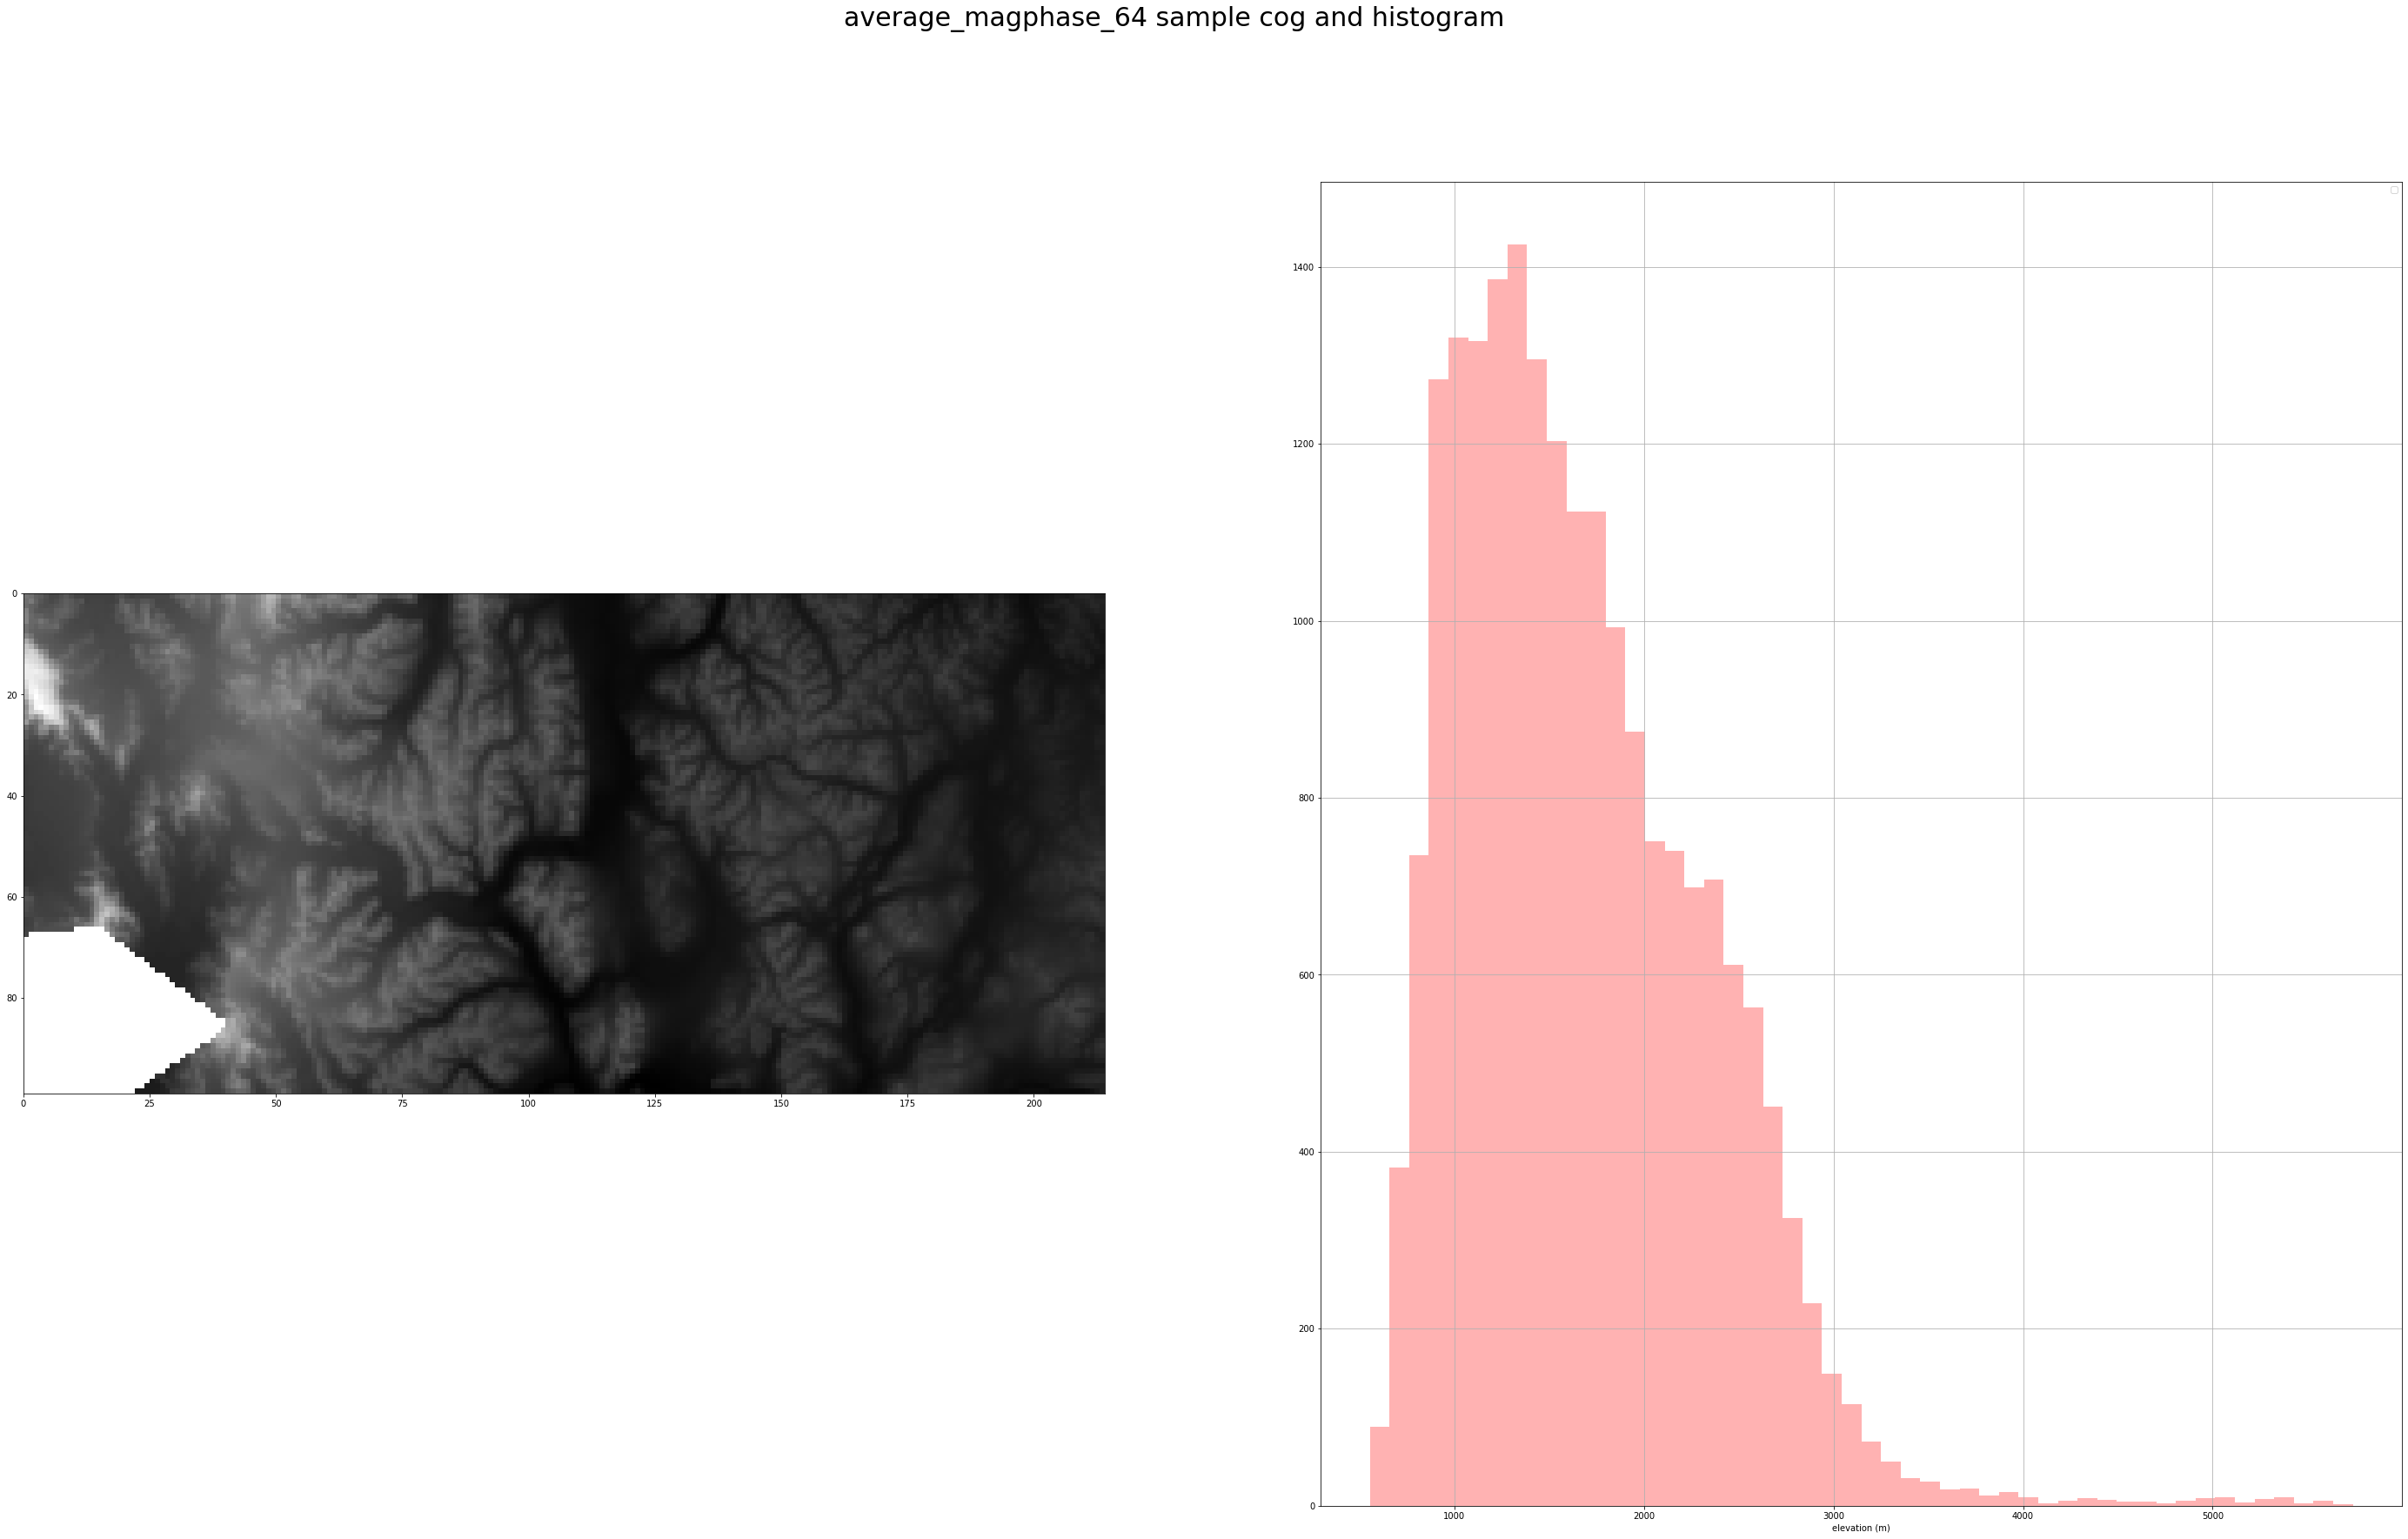

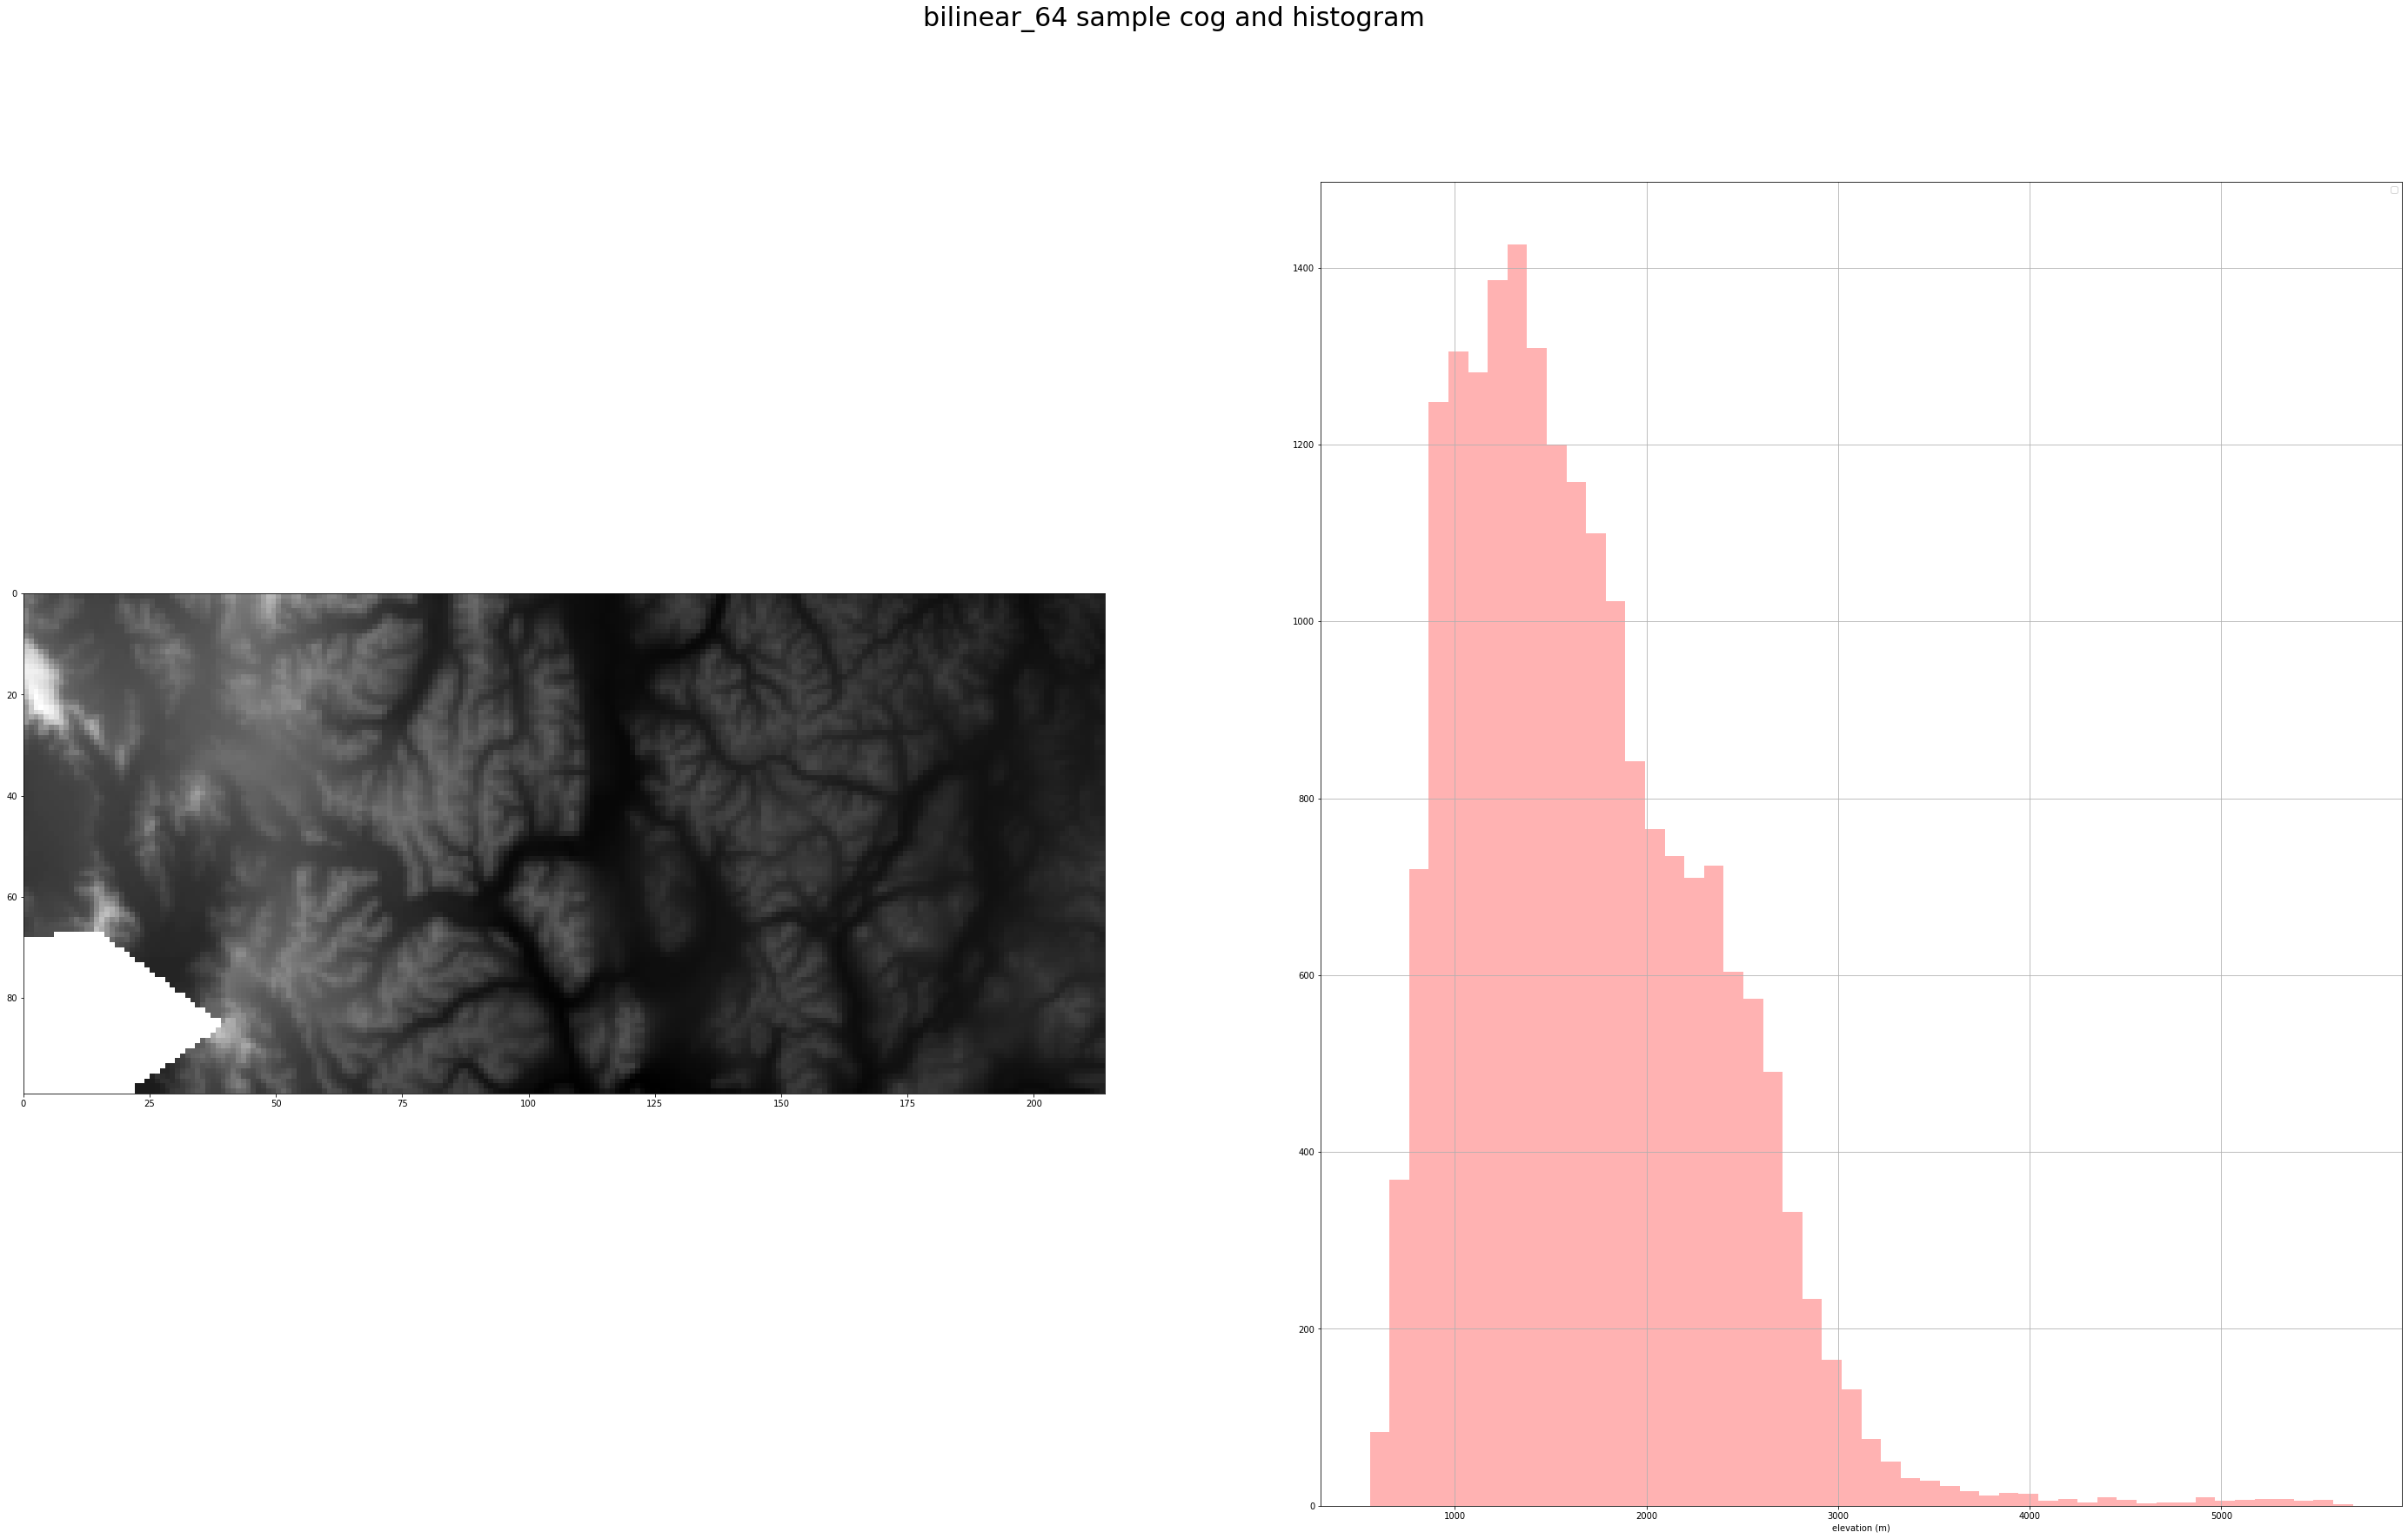

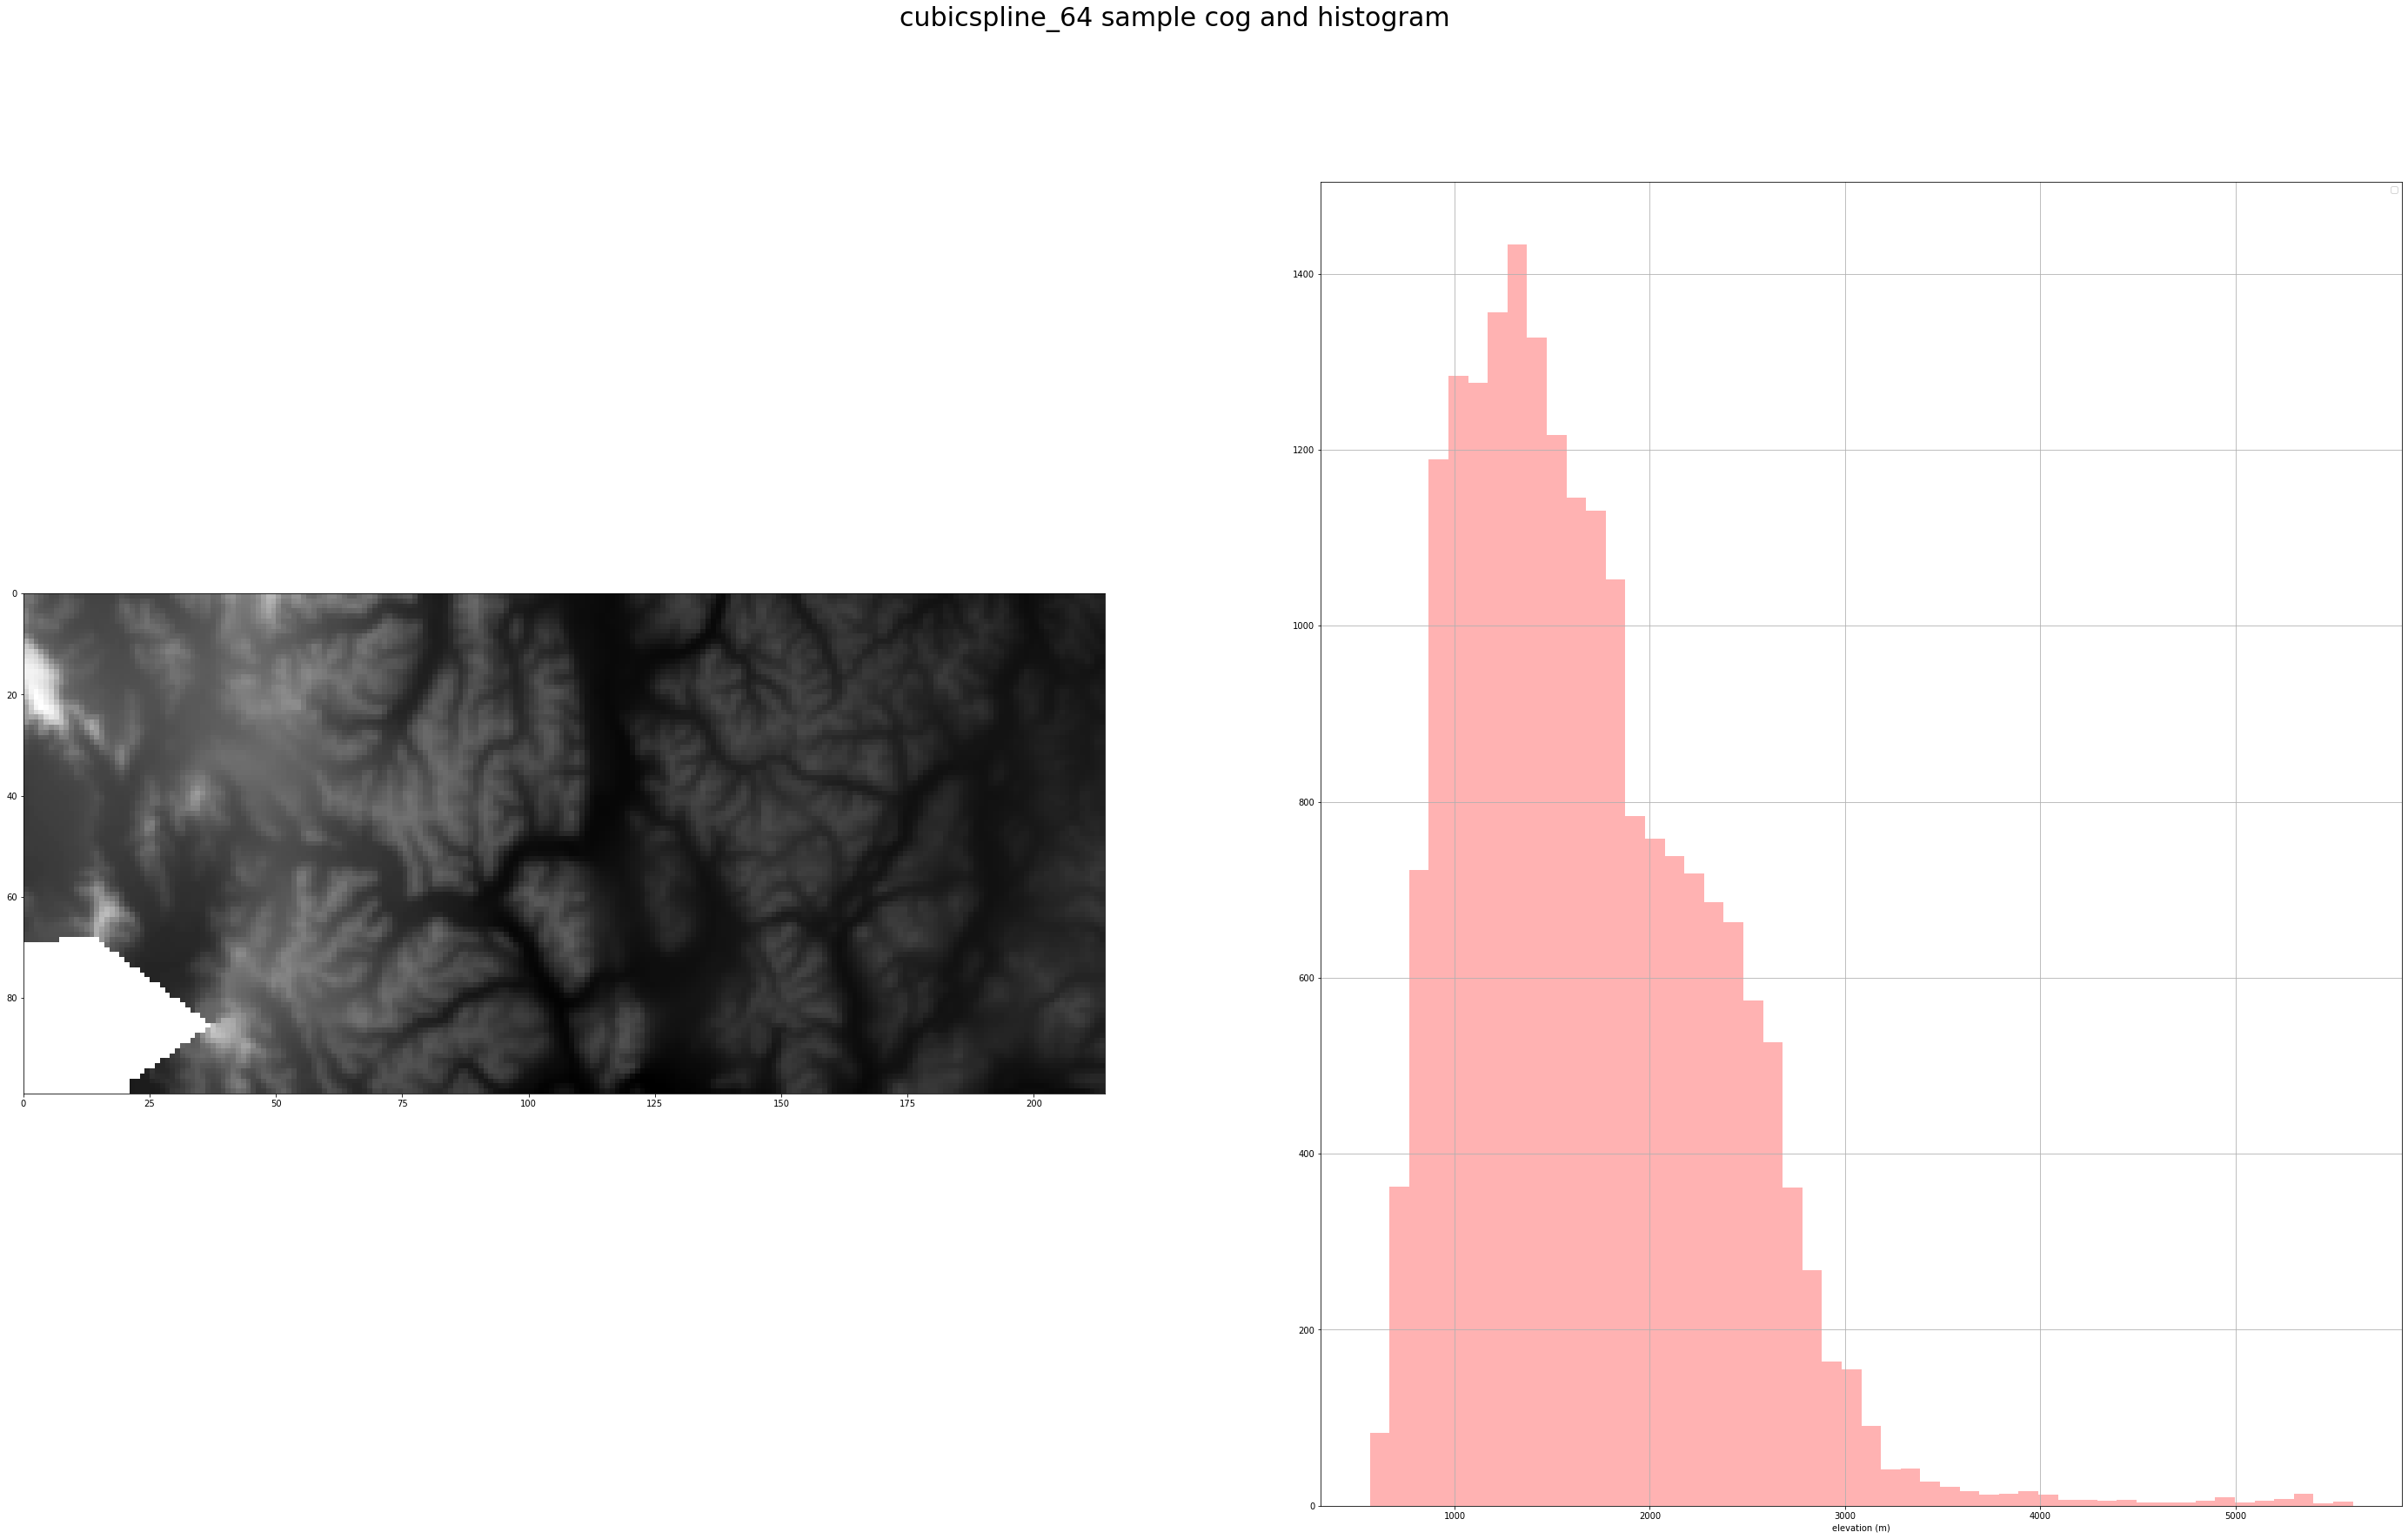

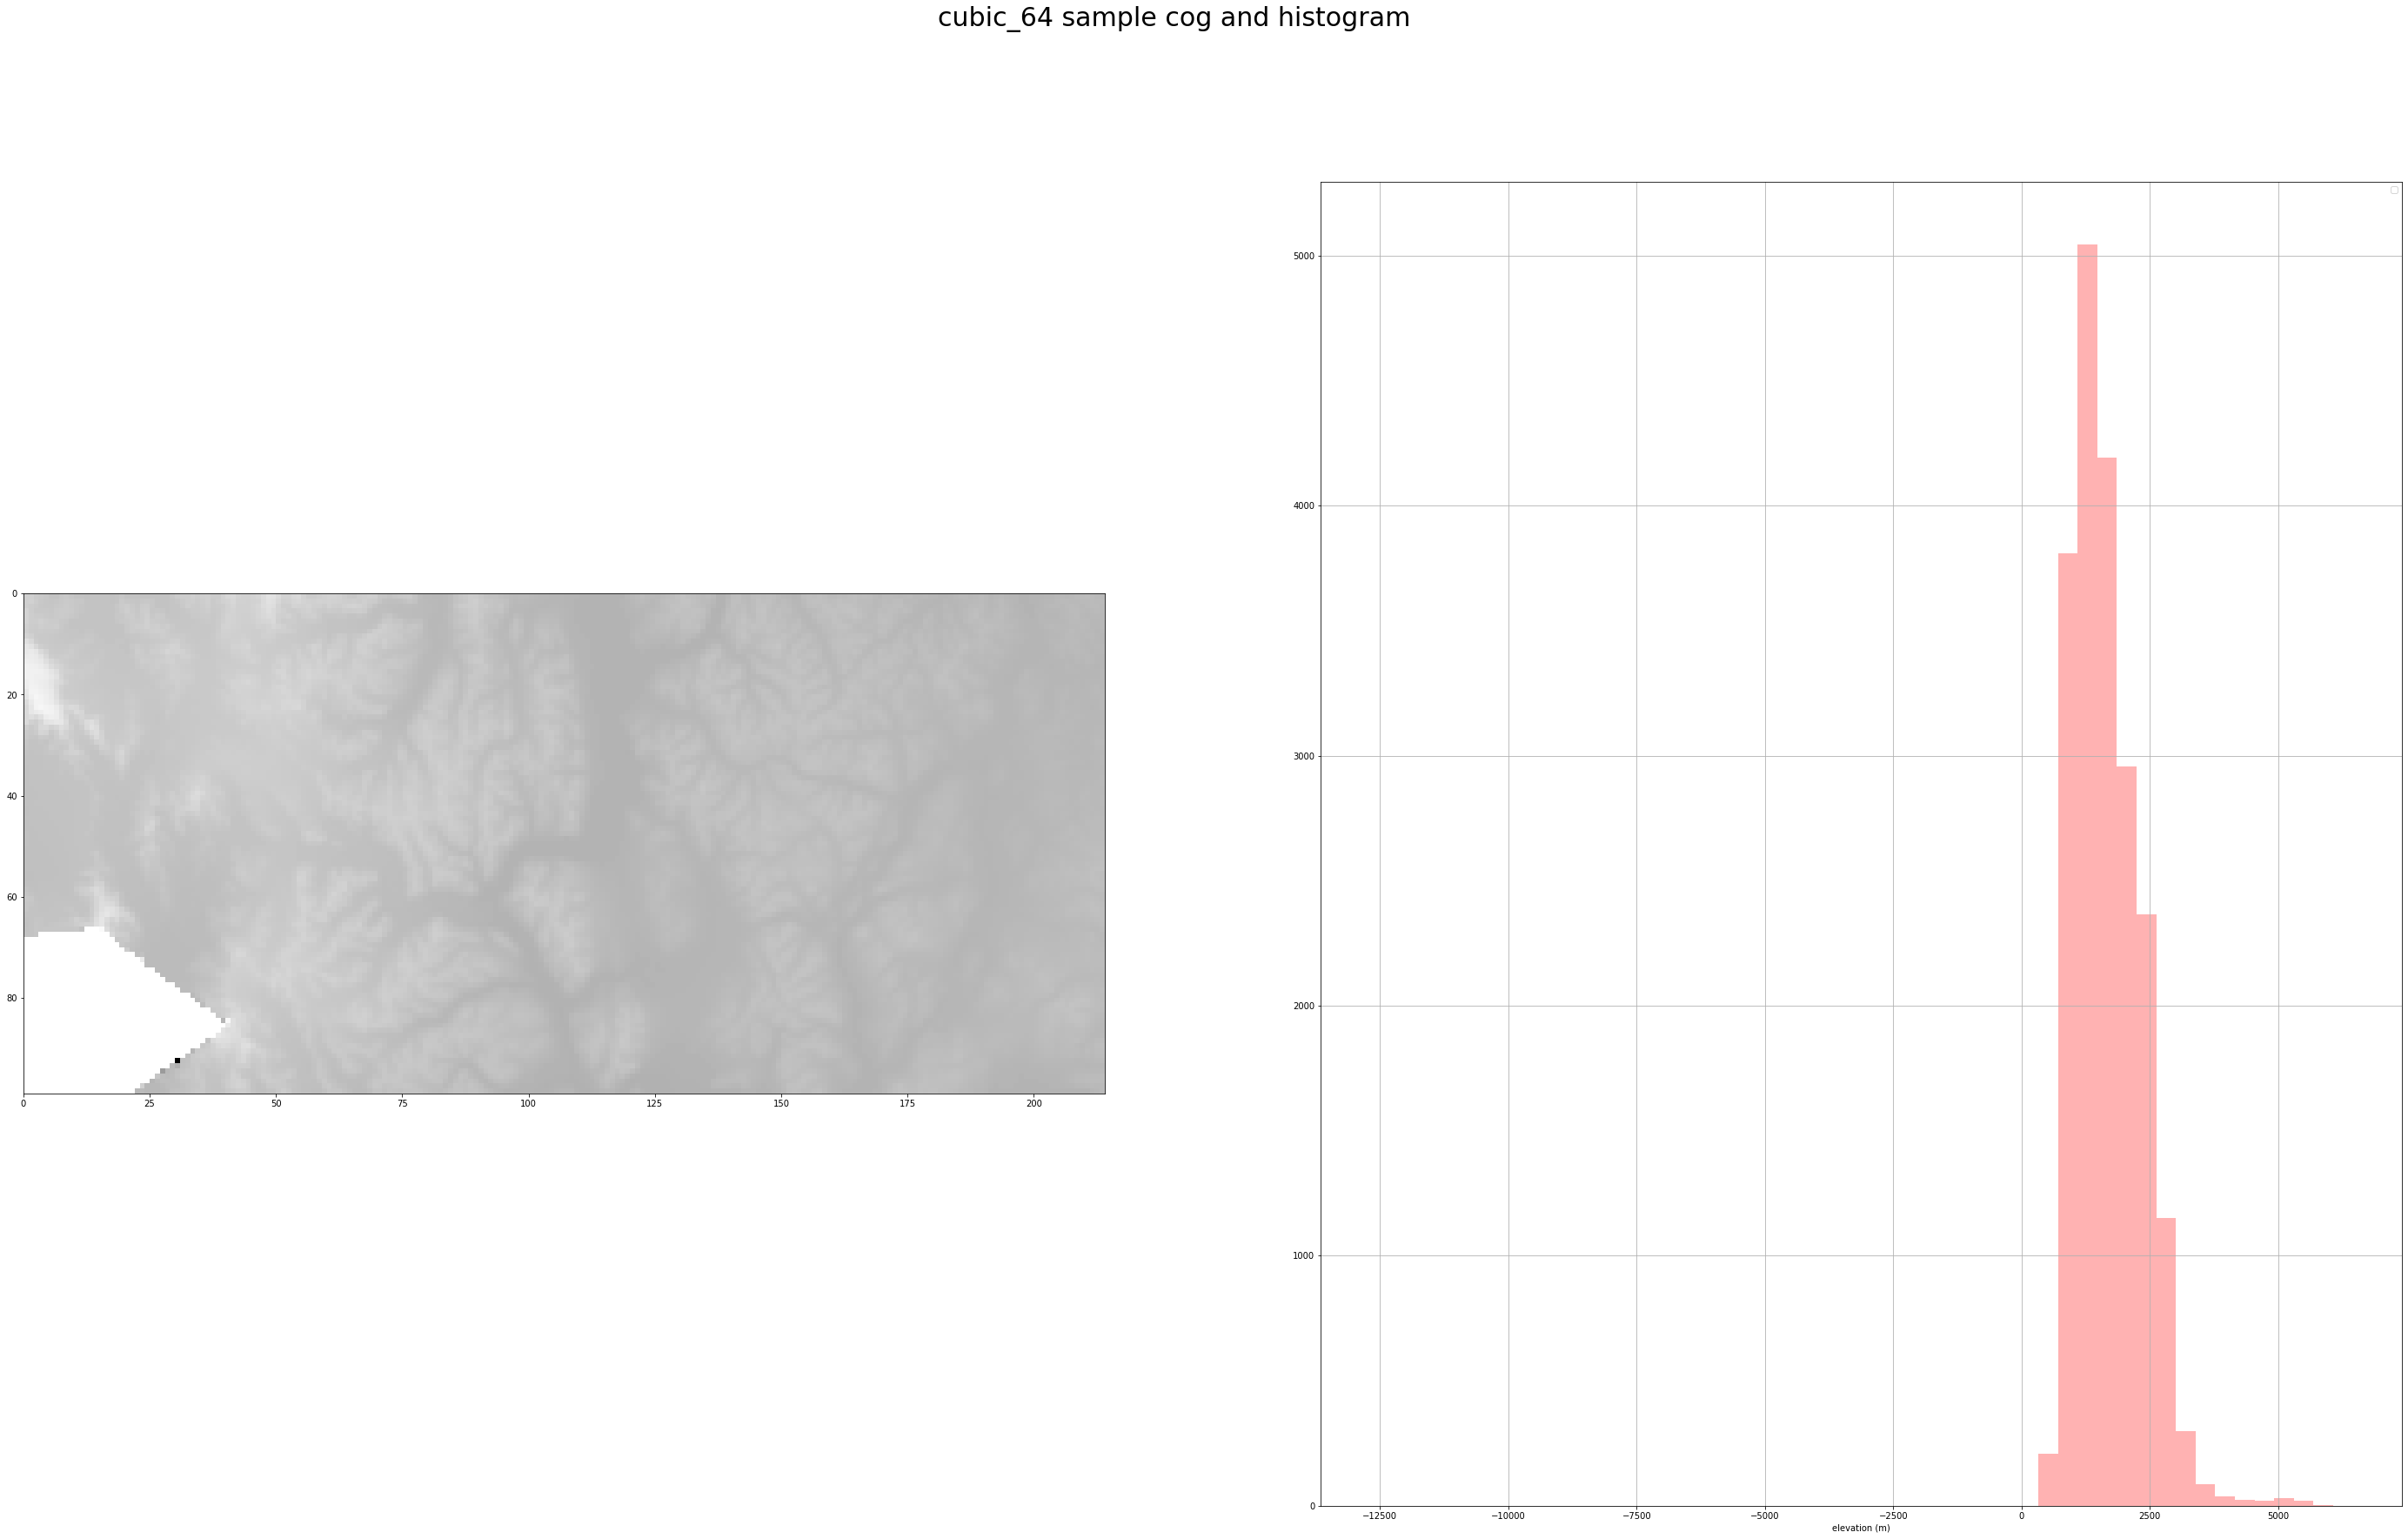

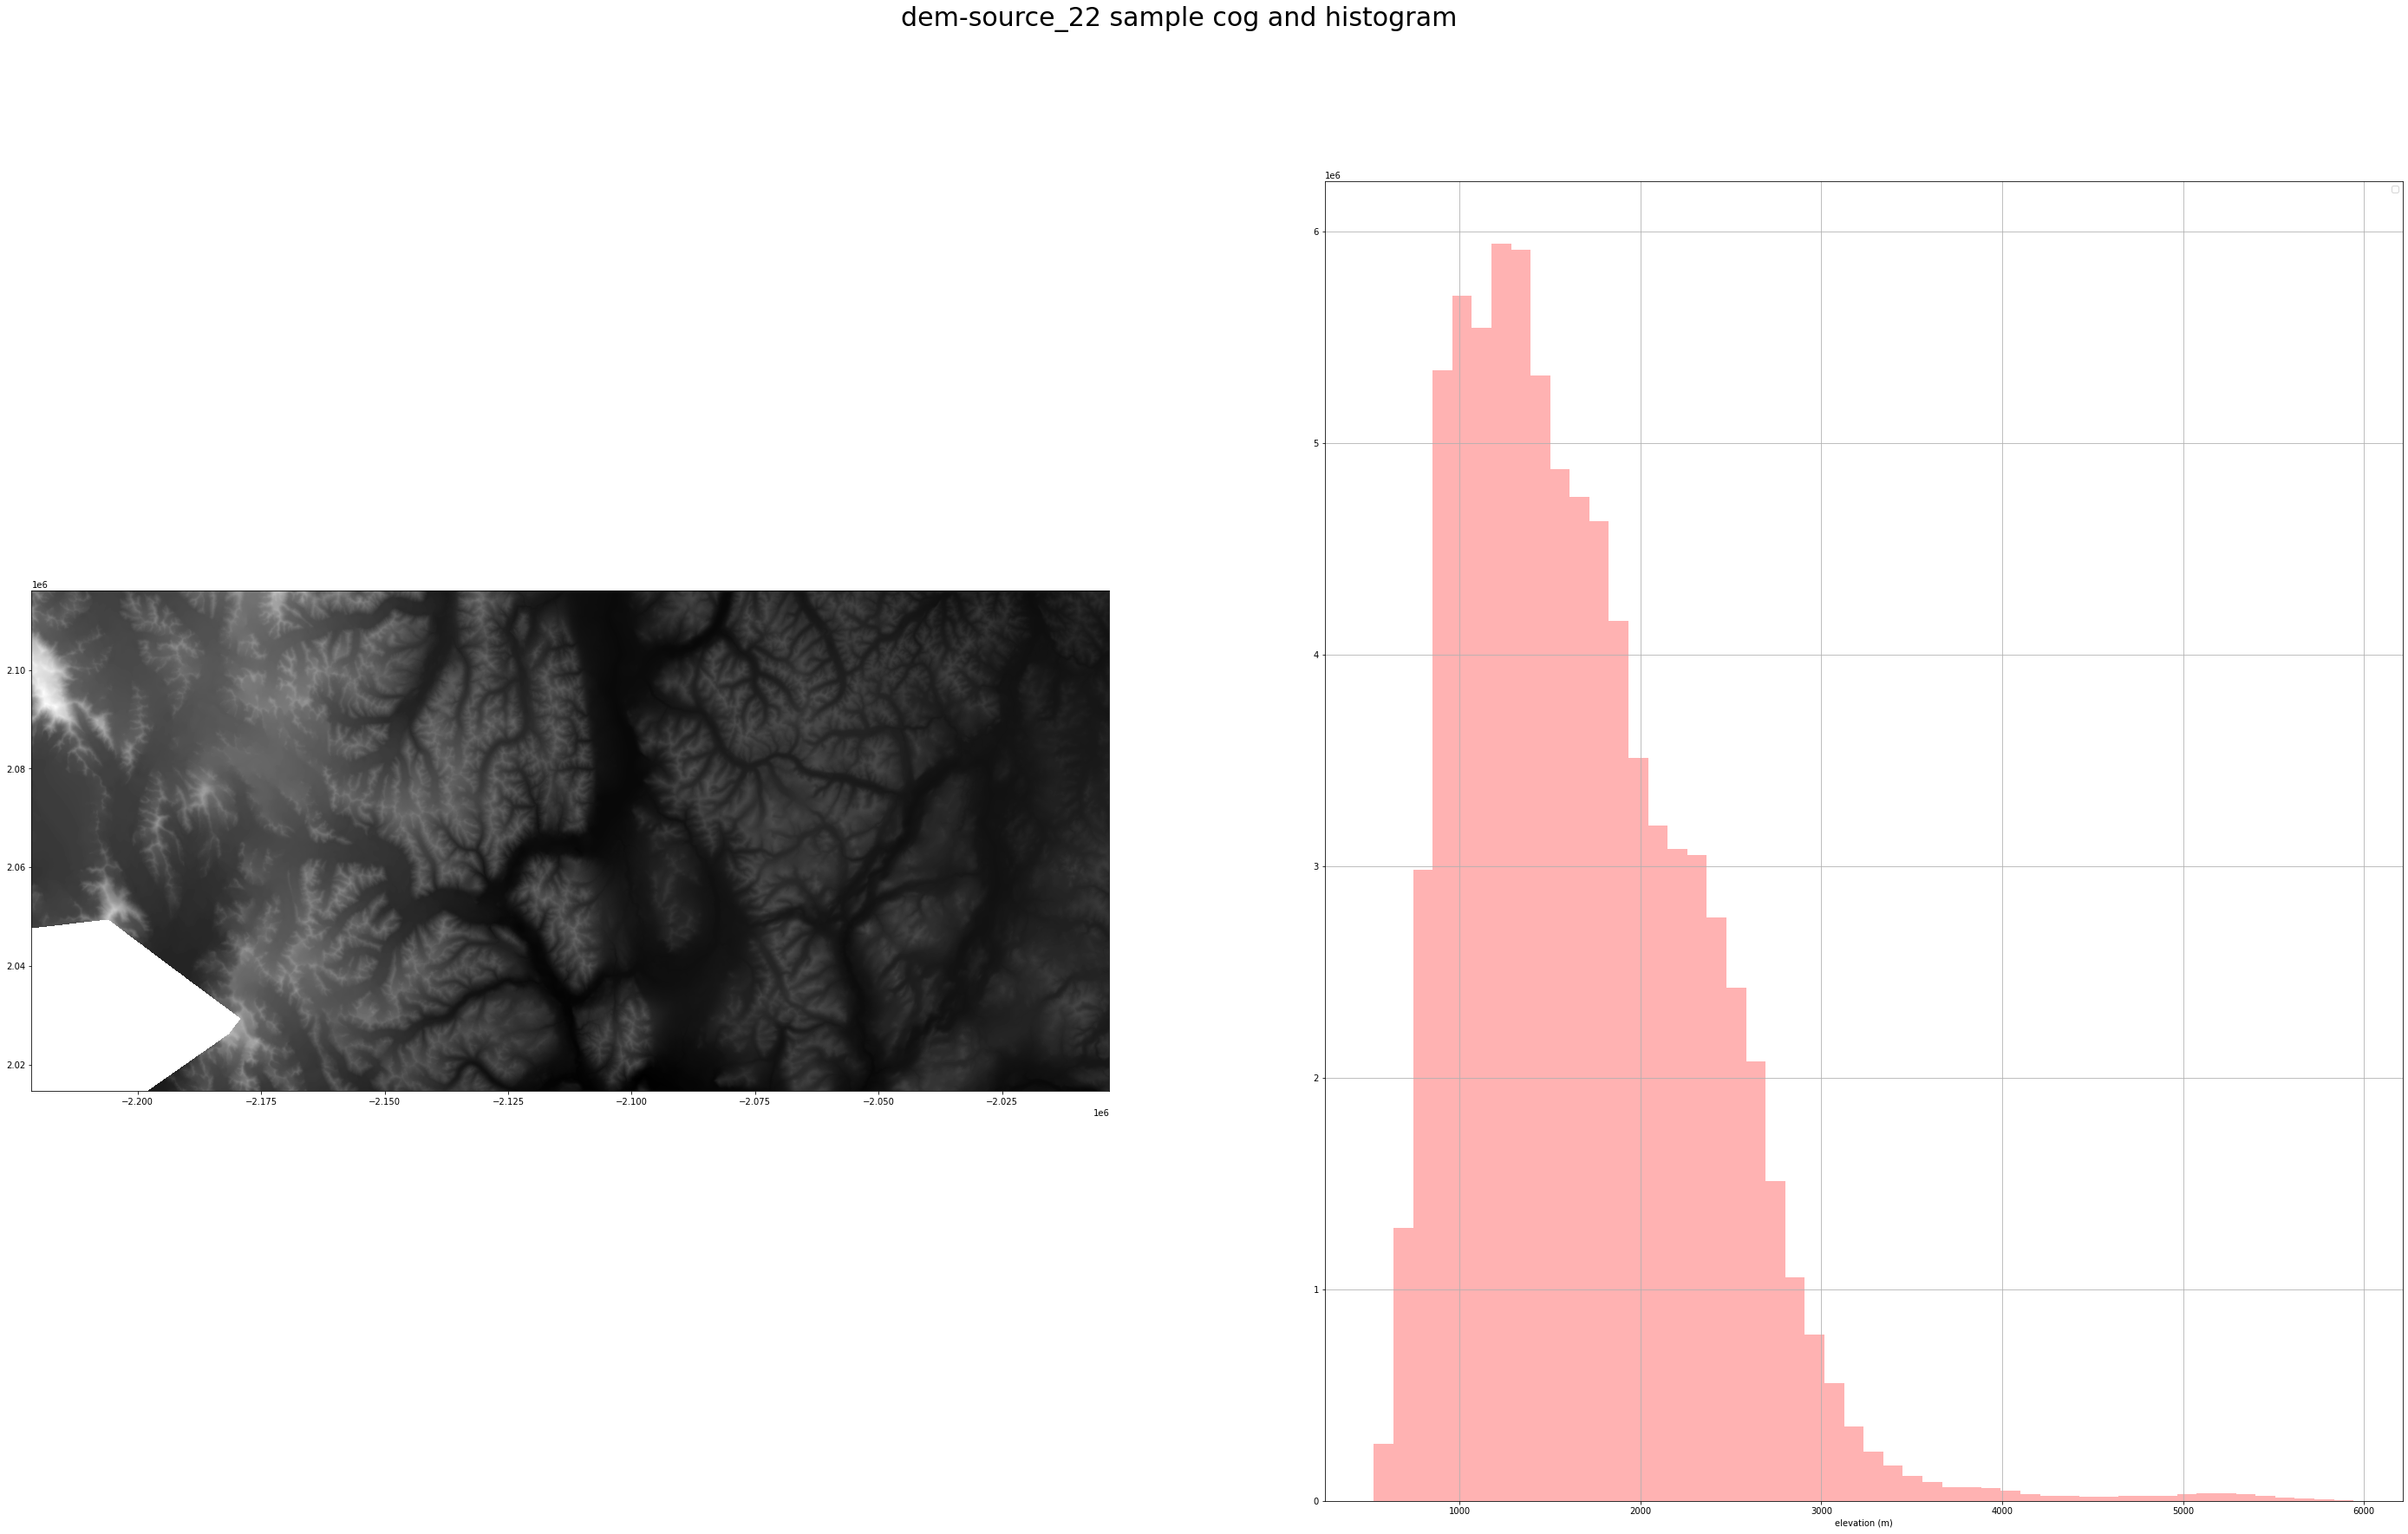

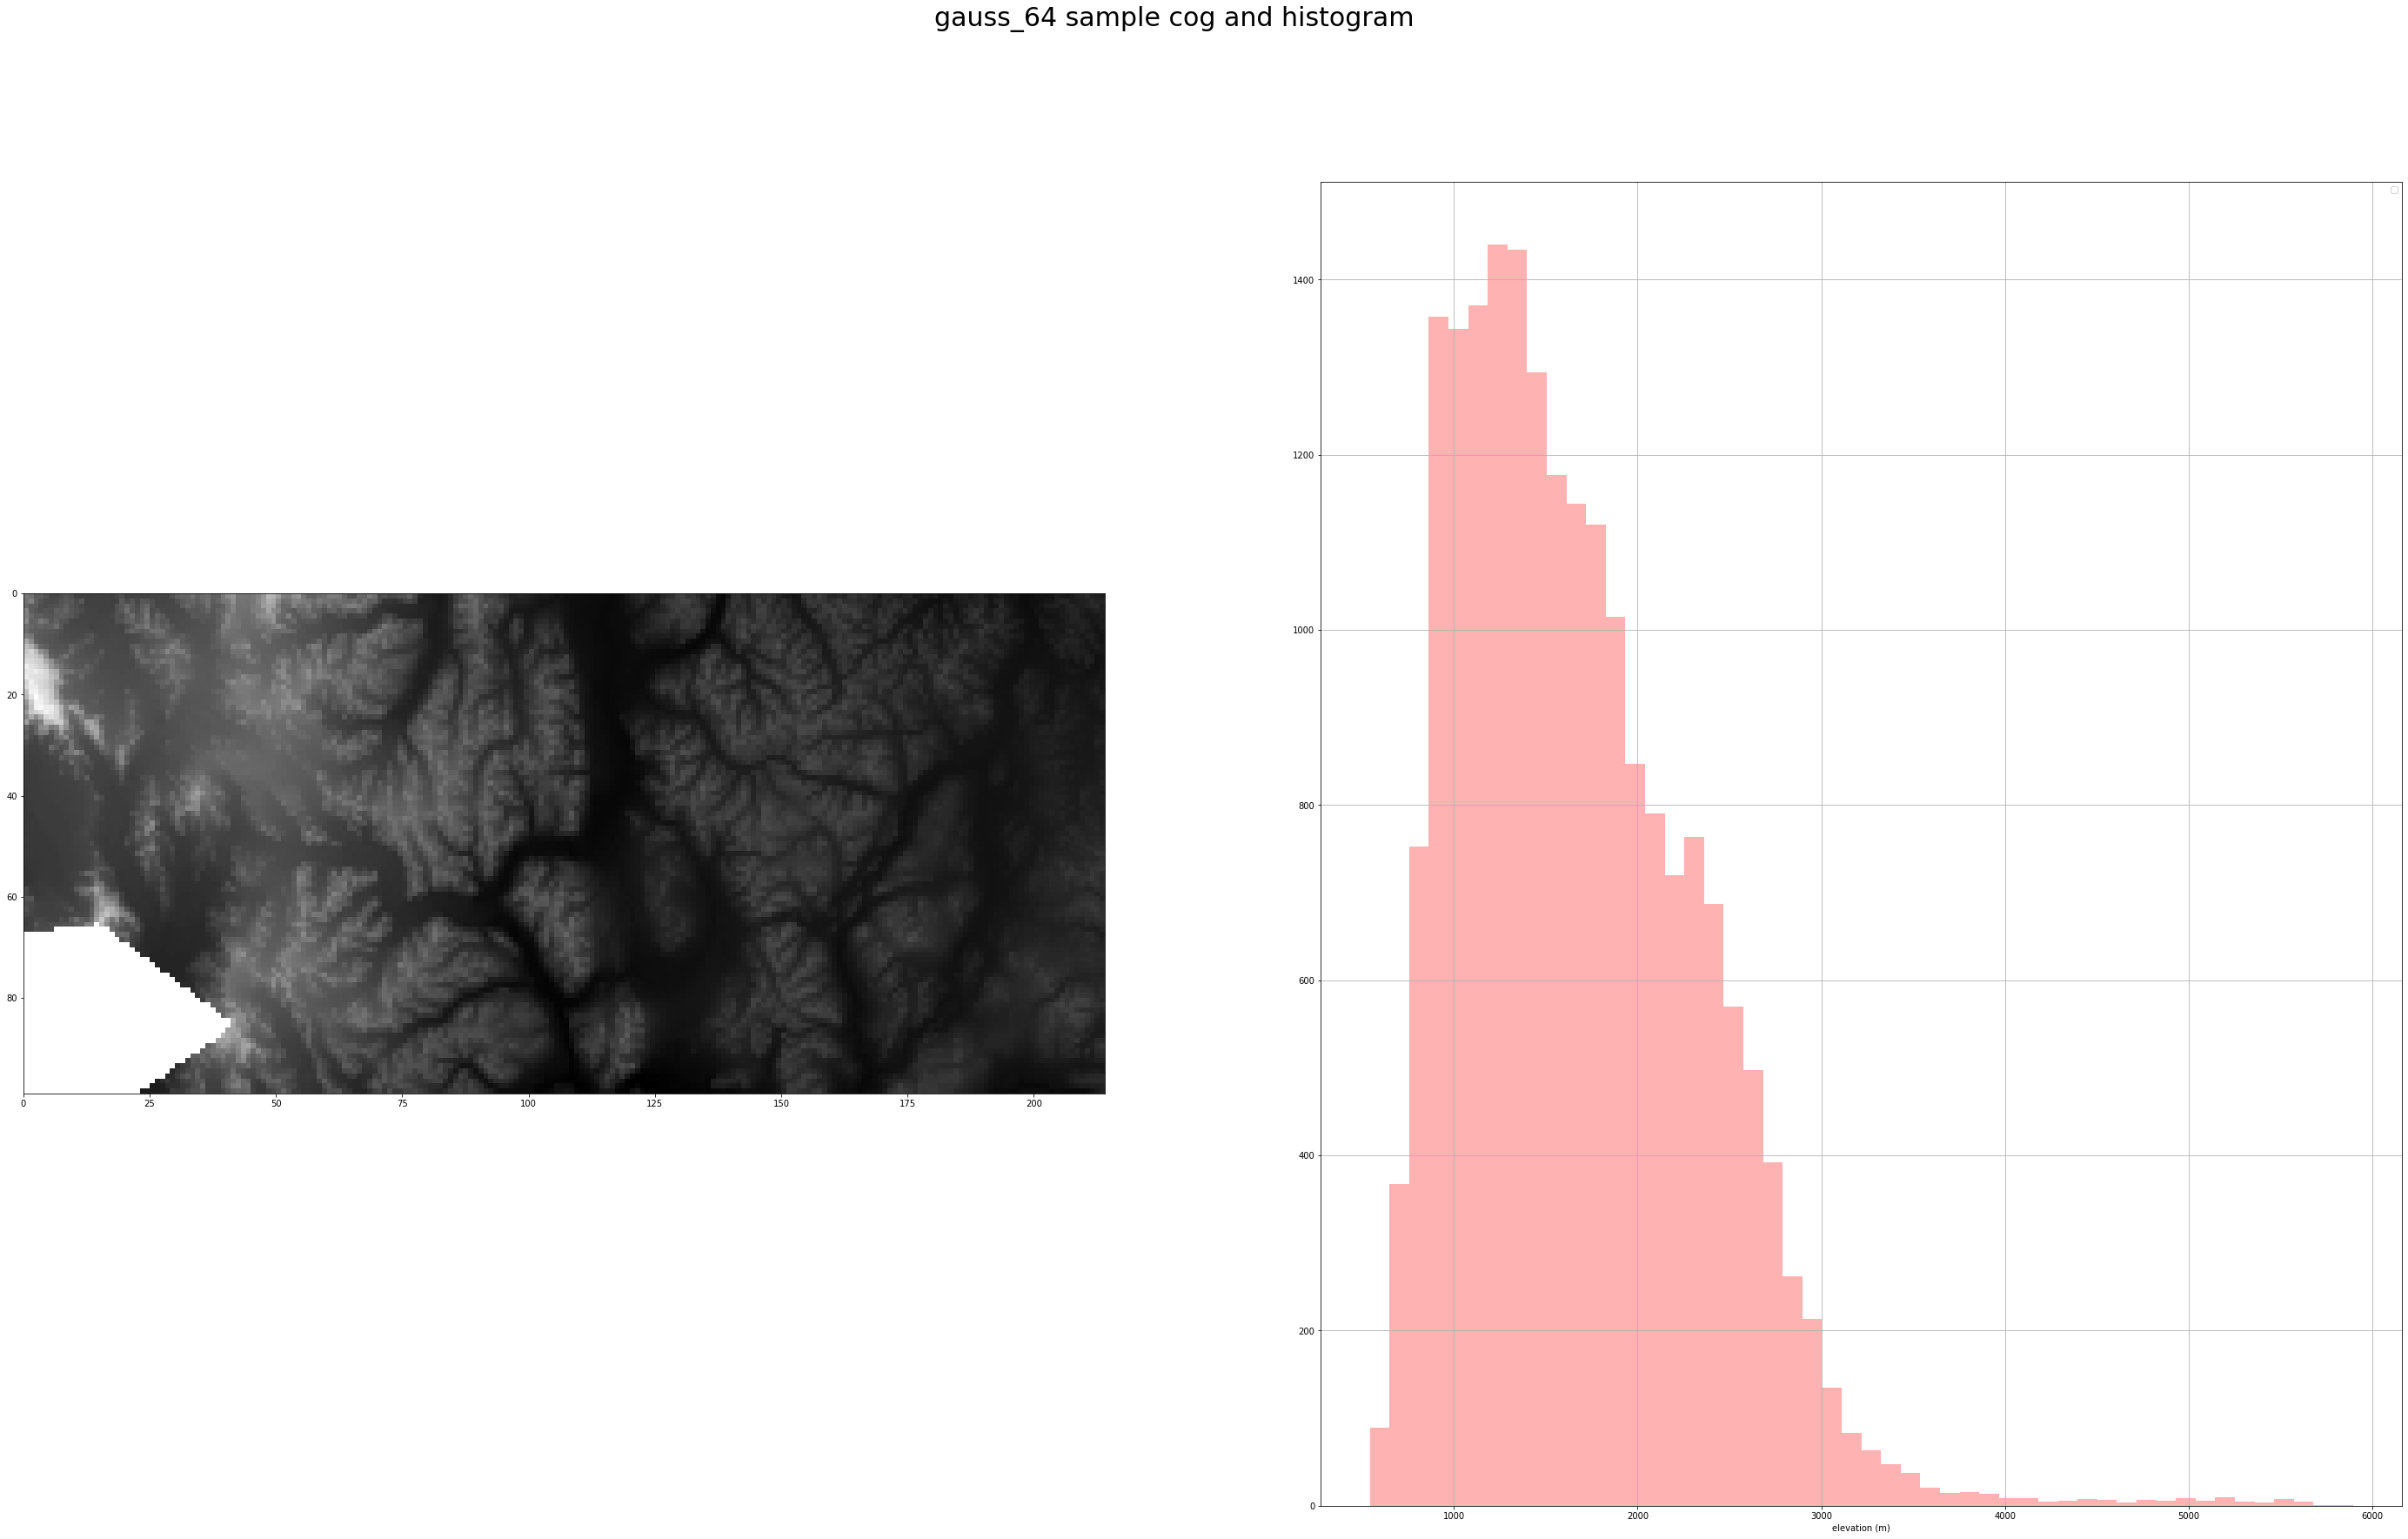

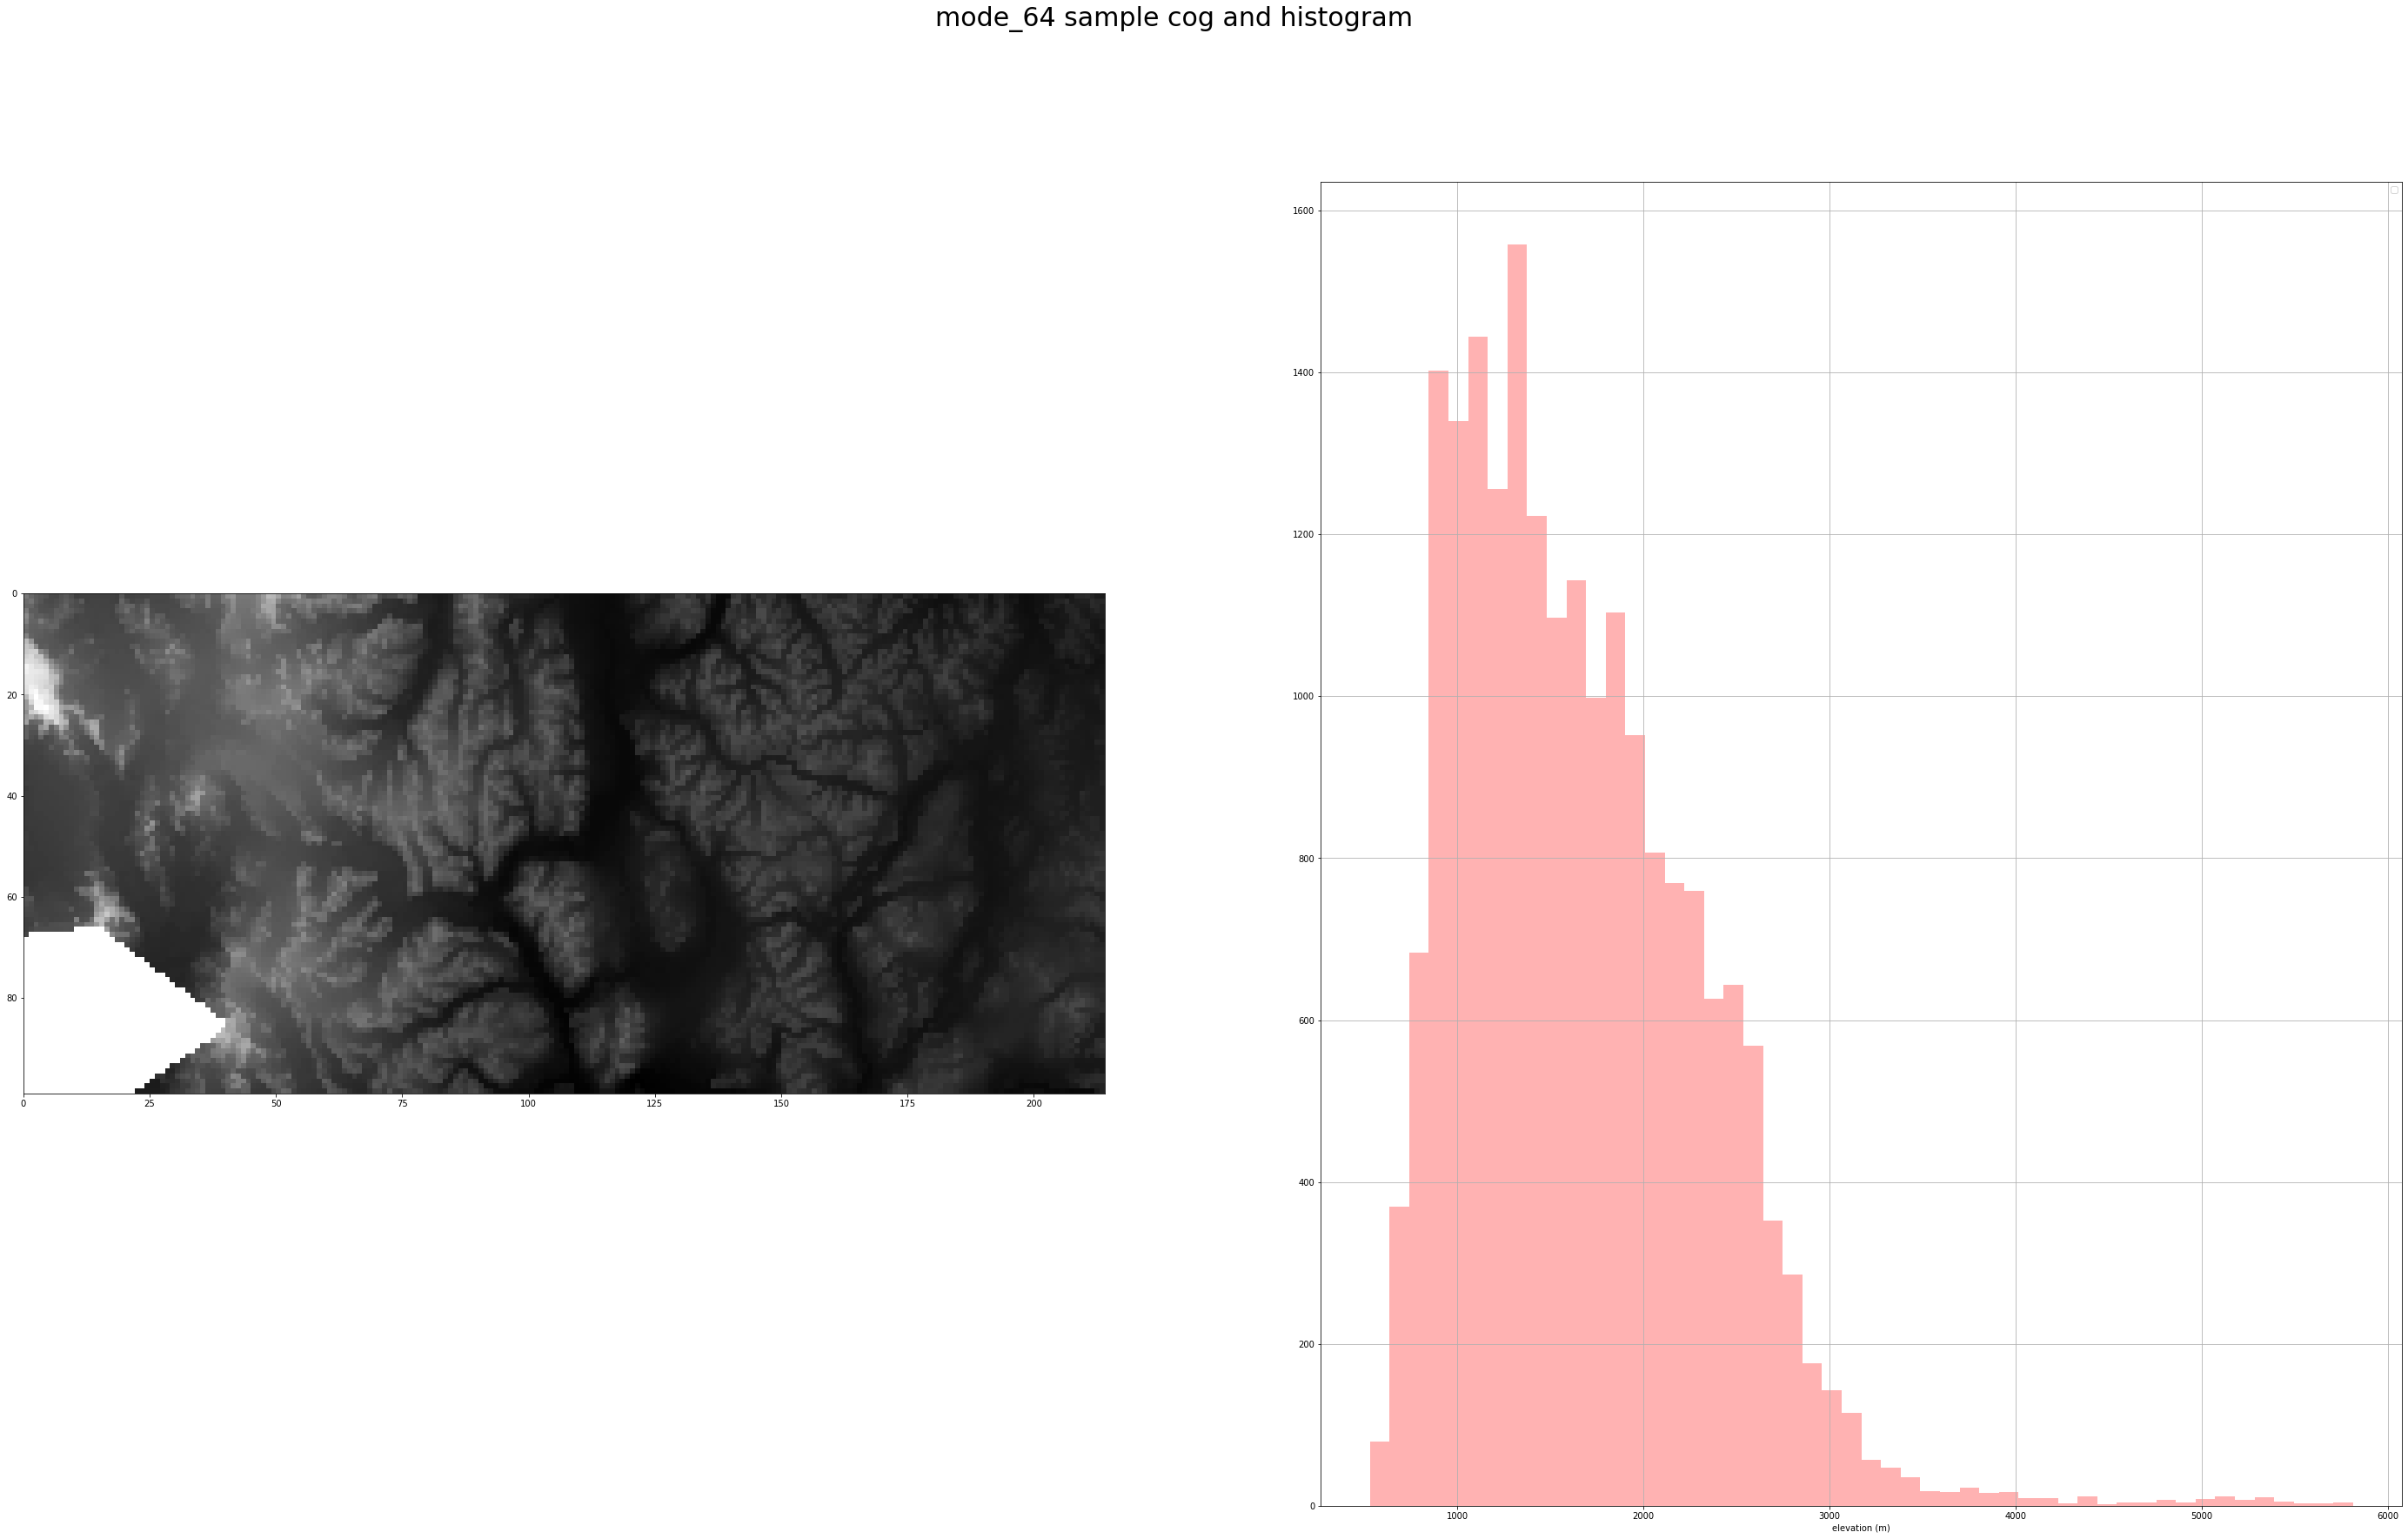

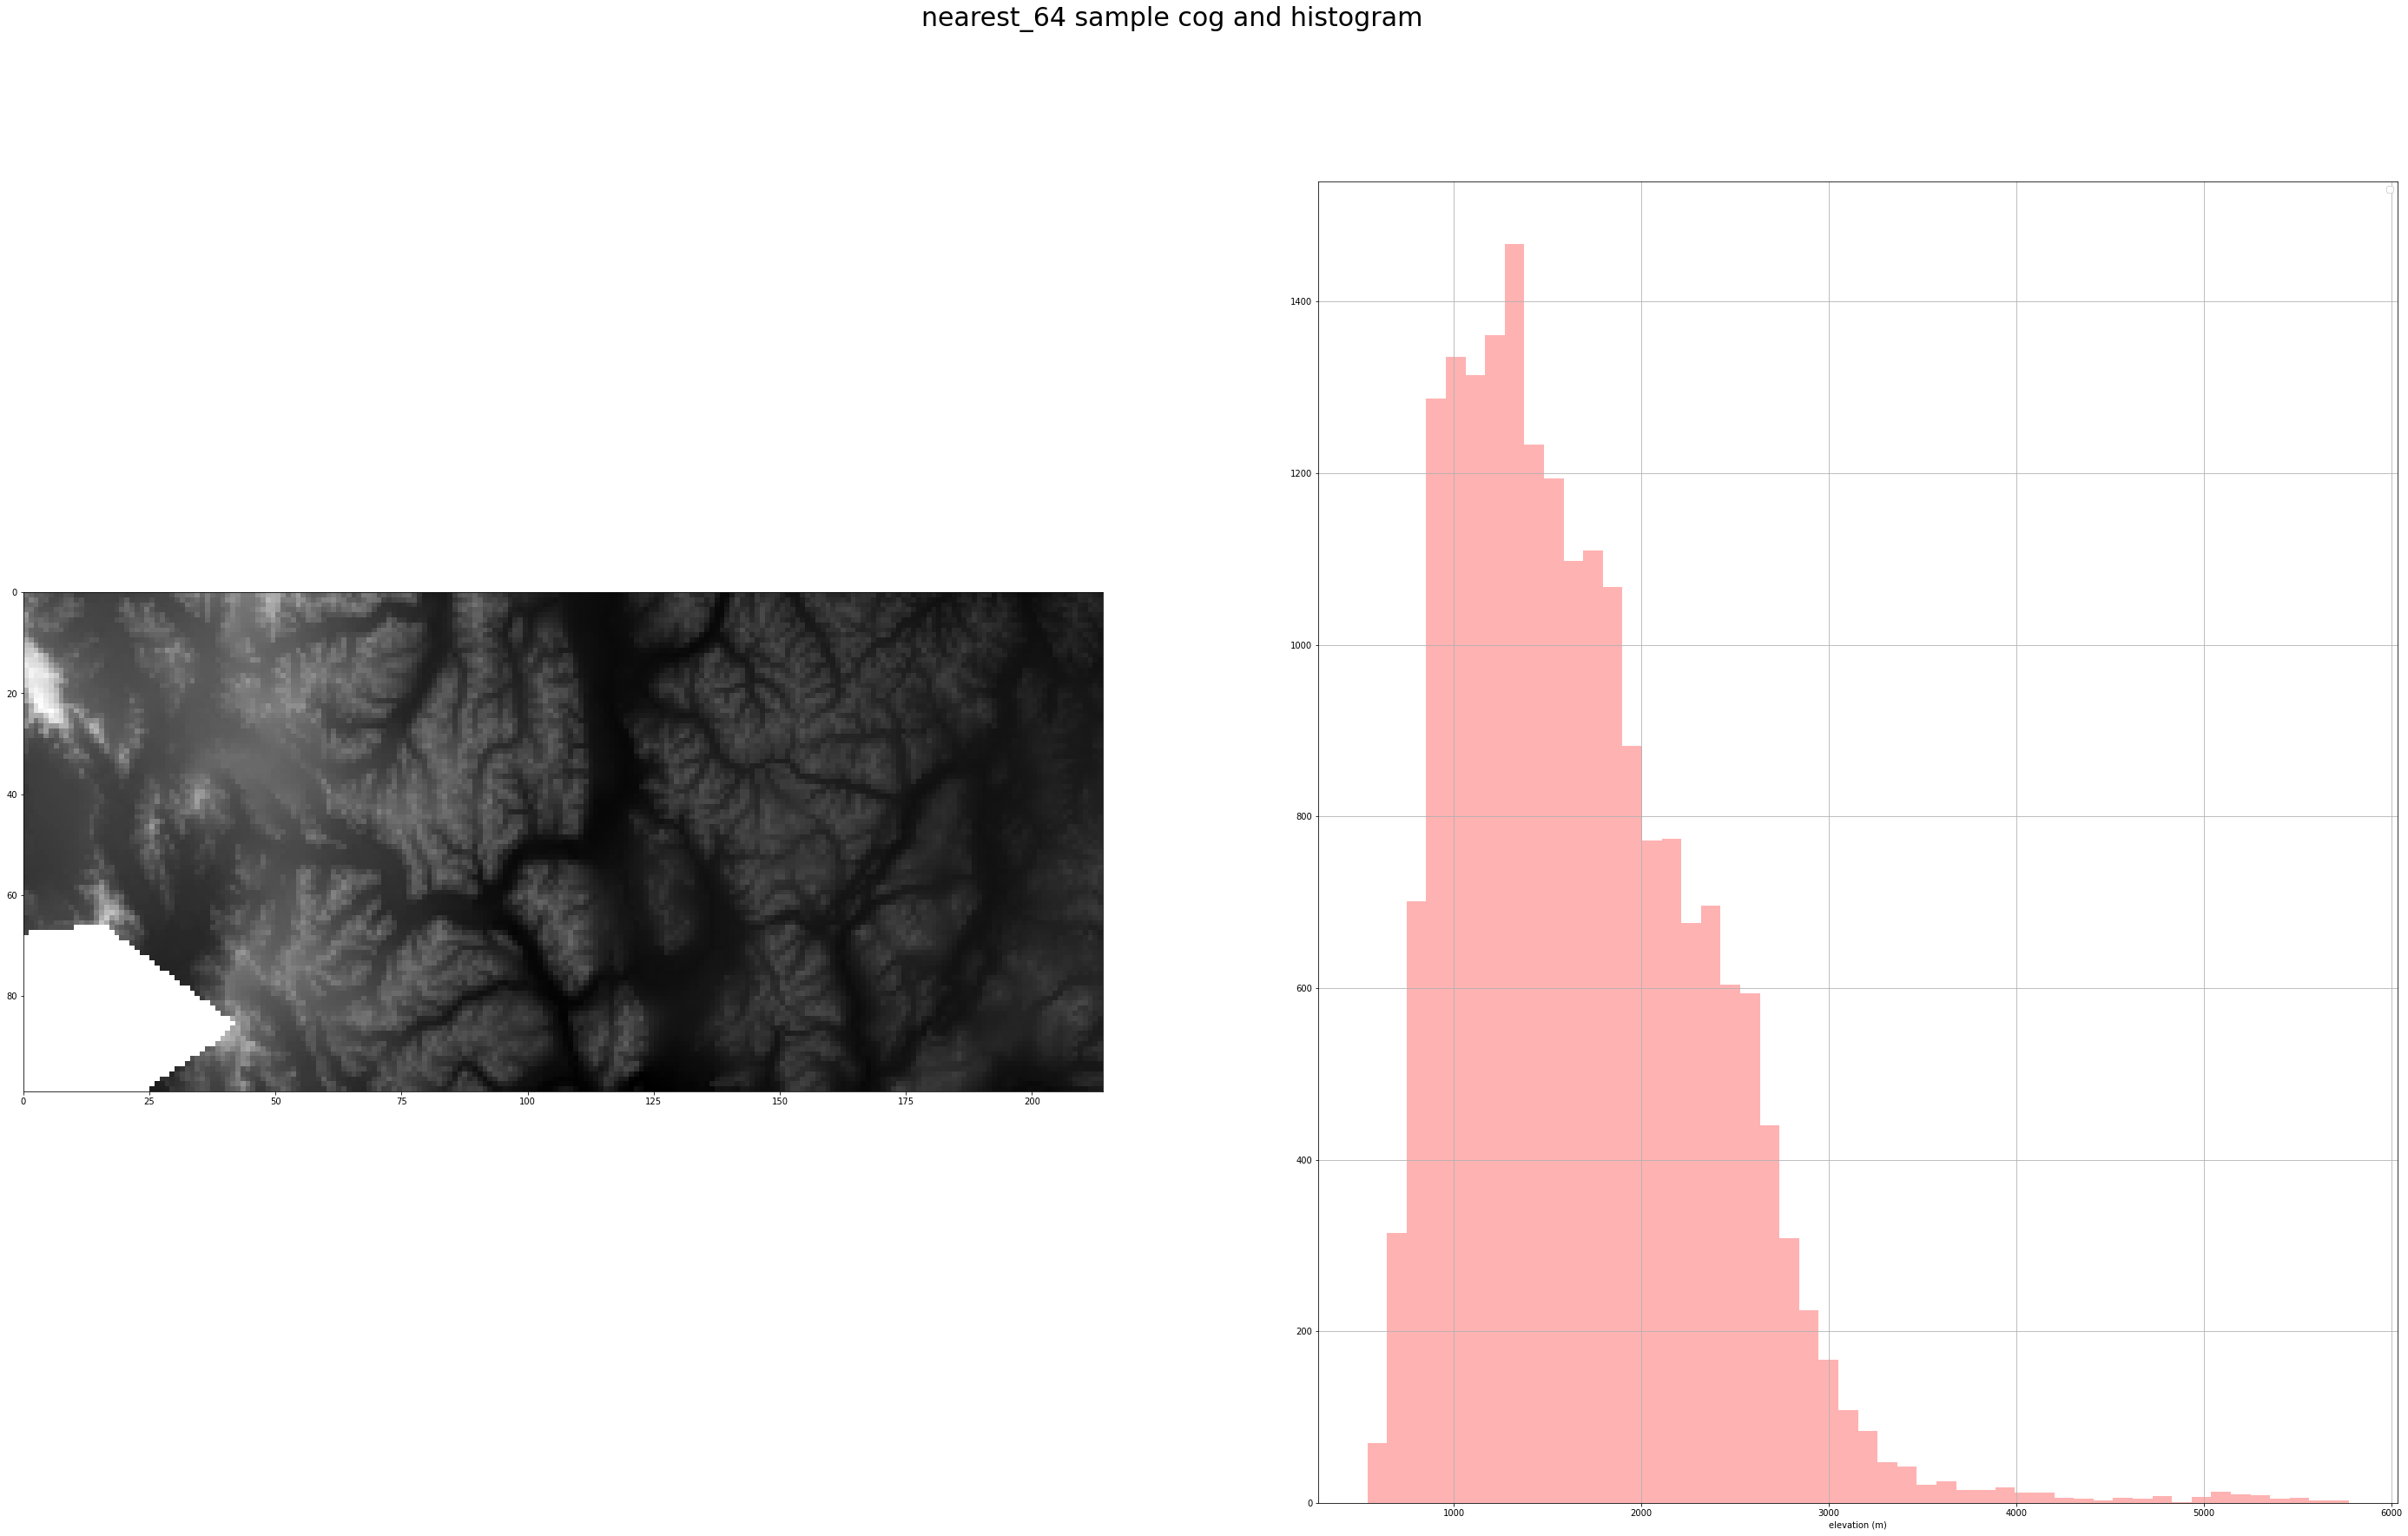

In [6]:
path = "C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/predata/sc2_data"
for filename in glob.glob(os.path.join(path, '*.tif')):
   with open(os.path.join(os.getcwd(), filename), 'r') as f: # open in readonly mode
    cog_sample = rasterio.open(filename)
    cur_name = os.path.basename(filename)[:-4]
    
    bound = str(cog_sample.bounds)
    crs = str(cog_sample.crs)
    dtype = str(cog_sample.dtypes[0])
    trans = str(cog_sample.transform)
    nodata = str(cog_sample.nodata)
    shape = str(cog_sample.shape)
    meta = str(cog_sample.meta)
    output = "{}_info".format(cur_name)
    f = open(output+'.txt',"w")
    f.write("stats: " + "\n" + 
            "bound: " + bound + "\n" + 
            "crs: " + crs + "\n" + 
            "dtype: " + dtype + 
            "transform: " + trans + 
            "nodata: " + nodata + 
            "shape: " + shape + 
            "metadata: " + meta)
    
    fig, (aximage, axhist) = pyplot.subplots(1, 2, figsize=(49,28))
    figtitle="{} sample cog and histogram".format(cur_name)
    fig.suptitle(figtitle,fontsize=30)
    #create histogram using rasterio show histogram, pass axes subplot handle to axhist
    bins=50
    show_hist(cog_sample, bins=bins, lw=0.0, 
              stacked=False, alpha=0.3,
              histtype='stepfilled',
              ax=axhist)
    axhist.set_title('')
    axhist.set_xlabel('elevation (m)')
    axhist.set_ylabel('')
    axhist.legend('')
    #create display image passing axes subplot handle to aximage
    show(cog_sample, cmap='gray',transform=cog_sample.transform, ax=aximage)
    #save the figure
    fname=path+cur_name+'.png'
    pyplot.savefig(fname,format='png')   

## Step 4:
<div class="alert alert-block alert-success">
The statistics of each resampled image can help determine the most approprite resampling method. This step will generate csv. files which contains all the necessary statistics.
</div>

In [11]:
fields = ['Name', 'Resampling_Method', 'Overview', 'Driver', 'Data Type', 
          'crs', 'Width', 'Height', 'Nodata_Pixels', 'Pixels_with_Values',
          'Pixel_Size', 'Min', 'Max', 'Range', 'Q1', 'Q3', 'Mean', 'Median', 
          'Std', 'Var']
rows = [fields]

for filename in glob.glob(os.path.join(path, '*.tif')):
   with open(os.path.join(os.getcwd(), filename), 'r') as f: # open in readonly mode
    cog = rasterio.open(filename)
    cur_name = os.path.basename(filename).split('_')[0]
    resampling = os.path.basename(filename)[:-7]
    overview = 32
    
    # delete nodata value
    cog_ar = cog.read(1)
    cog_ar = numpy.where(cog_ar==cog.nodata,numpy.nan,cog_ar)
    
    # stats
    driver = str(cog.meta['driver'])
    dtype = str(cog.meta['dtype'])
    crs = str(cog.meta['crs'])
    width = cog.meta['width']
    height = cog.meta['height']
    nodata = len(cog_ar[numpy.isnan(cog_ar)])
    data_with_values = len(cog_ar[~numpy.isnan(cog_ar)])
    pixel_size = cog.transform[0]
    
    cog_min = numpy.nanmin(cog_ar)
    cog_max = numpy.nanmax(cog_ar)
    cog_range = cog_max-cog_min
    cog_q1 = numpy.nanquantile(cog_ar, 0.25)
    cog_q3 = numpy.nanquantile(cog_ar, 0.75)
    cog_mean = numpy.nanmean(cog_ar)
    cog_median = numpy.nanmedian(cog_ar)
    cog_std = numpy.nanstd(cog_ar)
    cog_var = numpy.nanvar(cog_ar)
    
    cur_row = [cur_name,
               resampling,
               overview,
               driver,
               dtype,
               crs,
               width,
               height,
               nodata,
               data_with_values,
               pixel_size,
               cog_min,
               cog_max,
               cog_range,
               cog_q1,
               cog_q3,
               cog_mean,
               cog_median,
               cog_std,
               cog_var]
    
    rows.append(cur_row)
    # name of csv file
    output = "C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/predata/sc2_data/stats_{}.csv".format(cur_name)
    
    # writing to csv file 
    with open(output, 'w',newline='') as csvfile: 
        csvwriter = csv.writer(csvfile) 
        csvwriter.writerow(fields) 
        csvwriter.writerow(cur_row)
        
# name of csv file
output = "{}/stats_all.csv".format(path)

# writing to csv file 
with open(output, 'w',newline='') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerows(rows)

## Result & Analysis:

<div class="alert alert-block alert-warning">
To compare the source image to the thumbnails of different resampling method:<br>
<img src="img.png">
</div>

<strong>Conclusion: </strong>
<li>There are not enough information to determine which resampling method is approprite since there are no obvious differences between these thumbnails. </li>
<li>Cubic is not a good resampling method for this digital elevation model (DEM)</li>

<div class="alert alert-block alert-warning">
To compare the histograms of source image and different resampling methods:<br>
<img src="hist1.png">
<img src="hist2.png">
</div>

<strong>Conclusion:</strong> 
<li>There are not enough information to determine which resampling method is approprite since the histograms look similiar. </li>
<li>The histogram of Gaussian looks more close to the histogram of the soruce image, which indicates that it might be the most approprite resampling method. </li>

In [4]:
df = pd.read_csv("C:/Users/Owner/COOP4/PortableGit/nrcan-datacube/predata/sc2_data/stats_all.csv")
print(df)

          Name Resampling_Method  Overview Driver Data Type        crs  Width  \
0      average           average        32  GTiff     int16       None    214   
1      average  average_magphase        32  GTiff     int16       None    214   
2     bilinear          bilinear        32  GTiff     int16       None    214   
3  cubicspline       cubicspline        32  GTiff     int16       None    214   
4        cubic             cubic        32  GTiff     int16       None    214   
5   dem-source        dem-source        32  GTiff     int16  EPSG:3979  13635   
6        gauss             gauss        32  GTiff     int16       None    214   
7         mode              mode        32  GTiff     int16       None    214   
8      nearest           nearest        32  GTiff     int16       None    214   

   Height  Nodata_Pixels  Pixels_with_Values  Pixel_Size    Min   Max  Range  \
0      99            955               20231           1    555  5739   5184   
1      99            955     

<div class="alert alert-block alert-warning">
Some statistics in the csv file are selected are visualized by scatterplots:
<br>
<img src="mean.png">
<img src="median.png">
<img src="minmax.png">
<img src="std.png">
<img src="pixel.png">
</div>

### Conclusion: Gaussian and Nearest Neighbour are the most approprite resampling methods.